# Pre Work Installations for Kaggle API
### API Key Creation is needed. (https://www.kaggle.com/settings)
### Commands below installs kaggle, moves api key into needed directory, downloads needed datasheet and moves it into data folder.
### *Run only Once

In [ ]:
!pip install kaggle

In [ ]:
#Create API Key here
#https://www.kaggle.com/settings
#Scroll down to API and create new key, should download a json file in downloads folder.

#Windows
!cp "%USERPROFILE%/Downloads/kaggle.json" "%USERPROFILE%/.kaggle/kaggle.json"

#Linux
# !cp "~/Downloads/kaggle.json" "~/.kaggle/kaggle.json"

In [ ]:
#https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health
!kaggle datasets download -d "souvikahmed071/social-media-and-mental-health"

In [ ]:
#Windows
!mkdir "%USERPROFILE%/.kaggle"

#Linux/Mac
# !mkdir ~/.kaggle

In [ ]:
#Install Unzip command
!pip install unzip

In [ ]:
#Unzip downloaded datasheet into newly created data folder
!unzip social-media-and-mental-health.zip -d data/

In [ ]:
#Do not Need
!rm data/Correlation_between_Social_Media_use_and_Mental_Health.ipynb data/README.md

# Begin Here

In [84]:
#importing dependencies 
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [85]:
main_df = pd.read_csv("archive/smmh.csv")
main_df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,2022/04/18 7:25:58 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,2022/04/18 7:33:31 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2022/05/14 5:33:57 PM GMT+6,15.0,Male,Single,School Student,School,Yes,Instagram;YouTube;Discord;Reddit,Between 4 and 5 hours,1,...,1,3,3,3,3,3,3,1,1,1
470,2022/05/15 2:48:02 AM GMT+6,20.0,Female,Single,University Student,Company,Yes,Instagram;YouTube;Snapchat;Discord;Reddit;Pint...,Between 1 and 2 hours,2,...,1,3,5,3,5,1,2,5,4,5
471,2022/05/16 8:20:30 PM GMT+6,20.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,More than 5 hours,5,...,2,4,5,3,1,3,2,4,3,4
472,2022/05/17 5:12:19 PM GMT+6,35.0,Female,Married,Salaried Worker,Company,Yes,Facebook;Instagram;YouTube,Between 1 and 2 hours,3,...,2,3,3,2,1,2,2,2,4,4


In [86]:
def relabel_averageTime(row):
    if row['8. What is the average time you spend on social media every day?'] in ['Less than an Hour','Between 1 and 2 hours', 'Between 2 and 3 hours']:
        return '0-3 hours'
    elif row['8. What is the average time you spend on social media every day?'] in ['Between 3 and 4 hours', 'Between 4 and 5 hours']:
        return '3-5 hours'
    elif row['8. What is the average time you spend on social media every day?'] in ['More than 5 hours']:
        return '5+ hours'

#Run the apply method to df for each row calling relabel function
main_df['Average Time on Social Media'] = main_df.apply(lambda row: relabel_averageTime(row), axis=1)




In [87]:
#Keep only rows who use social media
main_df = main_df.loc[main_df["6. Do you use social media?"]=="Yes", :].copy()


In [88]:
column_list = main_df.columns.tolist()
print(column_list)

['Timestamp', '1. What is your age?', '2. Gender', '3. Relationship Status', '4. Occupation Status', '5. What type of organizations are you affiliated with?', '6. Do you use social media?', '7. What social media platforms do you commonly use?', '8. What is the average time you spend on social media every day?', '9. How often do you find yourself using Social media without a specific purpose?', '10. How often do you get distracted by Social media when you are busy doing something?', "11. Do you feel restless if you haven't used Social media in a while?", '12. On a scale of 1 to 5, how easily distracted are you?', '13. On a scale of 1 to 5, how much are you bothered by worries?', '14. Do you find it difficult to concentrate on things?', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', '16. Following the previous question, how do you feel about these comparisons, generally speaking?', '17. How often do you look to seek

In [89]:
main_df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Average Time on Social Media
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,...,5,2,5,2,3,2,5,4,5,0-3 hours
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,4,5,4,5,1,1,5,4,5,5+ hours
2,2022/04/18 7:25:58 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,...,2,5,4,3,3,1,4,2,5,3-5 hours
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,...,3,5,3,5,1,2,4,3,2,5+ hours
4,2022/04/18 7:33:31 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,...,4,5,5,3,3,3,4,4,1,0-3 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2022/05/14 5:33:57 PM GMT+6,15.0,Male,Single,School Student,School,Yes,Instagram;YouTube;Discord;Reddit,Between 4 and 5 hours,1,...,3,3,3,3,3,3,1,1,1,3-5 hours
470,2022/05/15 2:48:02 AM GMT+6,20.0,Female,Single,University Student,Company,Yes,Instagram;YouTube;Snapchat;Discord;Reddit;Pint...,Between 1 and 2 hours,2,...,3,5,3,5,1,2,5,4,5,0-3 hours
471,2022/05/16 8:20:30 PM GMT+6,20.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,More than 5 hours,5,...,4,5,3,1,3,2,4,3,4,5+ hours
472,2022/05/17 5:12:19 PM GMT+6,35.0,Female,Married,Salaried Worker,Company,Yes,Facebook;Instagram;YouTube,Between 1 and 2 hours,3,...,3,3,2,1,2,2,2,4,4,0-3 hours


## Age Groups Surveyed

In [90]:
ages_surveyed = main_df.iloc[:, 1].value_counts()
#print(ages_surveyed.head(10))
print(ages_surveyed.tail(10))

45.0    1
42.0    1
31.0    1
69.0    1
91.0    1
43.0    1
26.7    1
52.0    1
60.0    1
55.0    1
Name: 1. What is your age?, dtype: int64


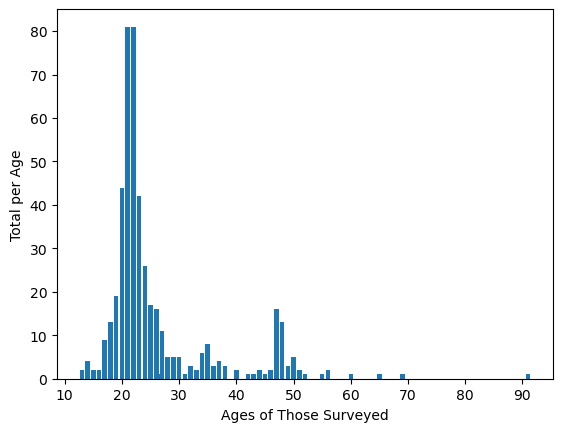

In [91]:
# Initial bar chart showing age distribution of those surveyed
plt.bar(ages_surveyed.index.values,ages_surveyed.values)

# Rotate drug names for readability
plt.xticks(rotation=0)

# X and Y axis names
plt.xlabel("Ages of Those Surveyed")
plt.ylabel("Total per Age")
plt.show()


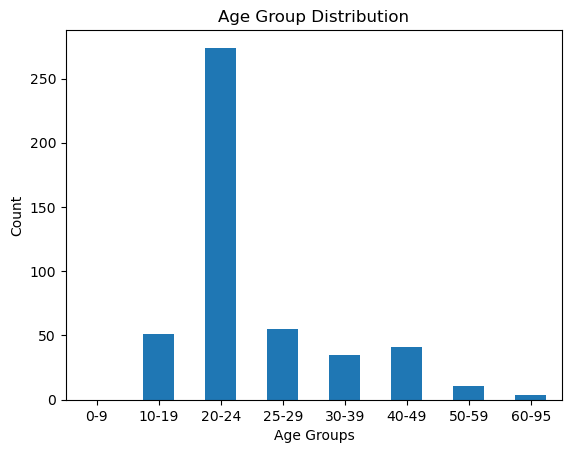

In [92]:
# Custom age ranges
bins = [0, 9, 19, 24, 29, 39, 49, 59, float('inf')]

# Labels for the age groups
labels = ['0-9', '10-19', '20-24', '25-29', '30-39','40-49','50-59', '60-95']  

main_df['Age Groups'] = pd.cut(main_df['1. What is your age?'], bins=bins, labels=labels,include_lowest=True)

# Count the number of individuals in each age group
age_group_counts = main_df['Age Groups'].value_counts()

# List ascending age groups 
age_group_counts=age_group_counts.sort_index()

# Plotting the bar chart
age_group_counts.plot(kind='bar')

# Adding some personality to the chart
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.xticks(rotation=0)

# Display the chart
plt.show()

## Genders Surveyed

In [93]:
# Catalogue all genders surveyed
genders_surveyed = set(main_df['2. Gender'])
print(genders_surveyed)

{'Non binary ', 'Non-binary', 'Male', 'There are others???', 'Nonbinary ', 'NB', 'unsure ', 'Female', 'Trans'}


In [94]:
# Create an "Others" group so results fall under "Male", "Female", or "Other"
main_df.replace('unsure ','Others', inplace=True)
main_df.replace('There are others???','Others', inplace=True)
main_df.replace('NB','Others', inplace=True)
main_df.replace('Trans','Others', inplace=True)
main_df.replace('Non binary ','Others', inplace=True)
main_df.replace('Nonbinary ','Others', inplace=True)
main_df.replace('Non-binary','Others', inplace=True)

genders_surveyed = set(main_df['2. Gender'])
print(genders_surveyed)

{'Others', 'Male', 'Female'}


In [95]:
# Counts for each gender category
gender_counts = main_df['2. Gender'].value_counts()
gender_counts

Female    259
Male      205
Others      7
Name: 2. Gender, dtype: int64

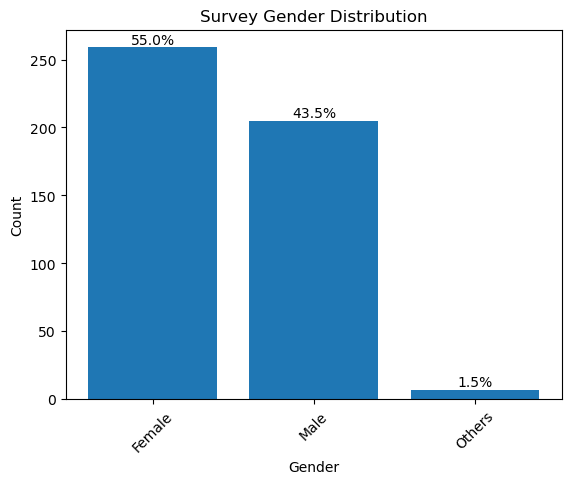

In [96]:
genders_surveyed = main_df['2. Gender'].value_counts()

# Plotting the bar chart
plt.bar(gender_counts.index, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survey Gender Distribution')

# Rotating x-axis labels 
plt.xticks(rotation=45)

# Adding percentagess to bar chart
total = gender_counts.sum()
for i, count in enumerate(gender_counts):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

In [97]:
main_df

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,"13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Average Time on Social Media,Age Groups
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,...,2,5,2,3,2,5,4,5,0-3 hours,20-24
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,5,4,5,1,1,5,4,5,5+ hours,20-24
2,2022/04/18 7:25:58 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,...,5,4,3,3,1,4,2,5,3-5 hours,20-24
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,...,5,3,5,1,2,4,3,2,5+ hours,20-24
4,2022/04/18 7:33:31 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,...,5,5,3,3,3,4,4,1,0-3 hours,20-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2022/05/14 5:33:57 PM GMT+6,15.0,Male,Single,School Student,School,Yes,Instagram;YouTube;Discord;Reddit,Between 4 and 5 hours,1,...,3,3,3,3,3,1,1,1,3-5 hours,10-19
470,2022/05/15 2:48:02 AM GMT+6,20.0,Female,Single,University Student,Company,Yes,Instagram;YouTube;Snapchat;Discord;Reddit;Pint...,Between 1 and 2 hours,2,...,5,3,5,1,2,5,4,5,0-3 hours,20-24
471,2022/05/16 8:20:30 PM GMT+6,20.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,More than 5 hours,5,...,5,3,1,3,2,4,3,4,5+ hours,20-24
472,2022/05/17 5:12:19 PM GMT+6,35.0,Female,Married,Salaried Worker,Company,Yes,Facebook;Instagram;YouTube,Between 1 and 2 hours,3,...,3,2,1,2,2,2,4,4,0-3 hours,30-39


# Distraction

## Is Social Media a distraction from other important tasks?
- From the 'Distraction from Social Media chart', we can see the count of people that have ratings of 4 and 5, for how easily they are distracted by Social Media, are over the 100 count mark. Contrarily, people that rated 1 and 2 are under the 90 count mark. The chart shows that a significant amount of people are easily distracted by Social Media. We will factor in age, gender, occupation, average time spent on social media, to determine if there is a an existing correlation. The ratings of 1 -5 in this section represents how easily people are distracted by social media with 1 being not at all to 5 being extremely distracted. We also found the mean distraction rating score to use it as a standard when performing statistical tests on the gender categories.

### Does Age, Gender, Average Time Spent on Social Media, and Occupation play a role in how easily one is by social media?
- There are no significant differences between different genders in terms of how easily they are distracted by social media. The correlation that exists between the two factors is very weak since it's close to 0. This suggests that gender is not a significant factor that contributes how easily people are distracted by social media.
- There is a weak negative correlation between age and distraction rating which suggests that as age increases, the likelihood of being distracted decreases. 
- There is a moderate correlation that exists between average time spent on social media and how easily an individual is distracted by social media. The 'Distraction Level by Average Time Spent' bar chart shows that there is an increasing trend of higher ratings as more time is spent on social media. 
- A weak correlation exists between occupation and the distraction level which suggests that depending on the nature of occupation, the level of distraction varies. In this case, University Students tend to experience higher levels of distraction 

### Is there a correlation between age and the average time spent on social media based off of how easily they are distracted by social media?
- There is almost no correlation between age and average time spent on social media for distraction depending on the correlation coefficient = 0.02. There is also an extremely high p value which suggests that the correlation itself is not significant

### Is there a correlation between occupation and the average time spent on social media based off of how easily they are distracted by social media?
- A weak negative correlation exists between these two factors. Because the correlation coefficient is at -0.1919,here is a slight tendency that people with different occupations tend to spend different times on social media 
- The heatmap 'Distraction Rating by Occupation and Average Time on Social Media' also shows that different ratings were dependent on the occupation group and average time spent. For instance, university students show a relatively consistency in their distraction ratings across the different average times spent on social media. This conclusion, shows that other groups had higher tendencies of being distracted dependent on the average time spent compared to when we were just testing against occupation and distraction. In the previous case, university students tend to have the most amount distraction without taking average time into factor.

## Plotting the distribution of the population based on rating

<function matplotlib.pyplot.show(close=None, block=None)>

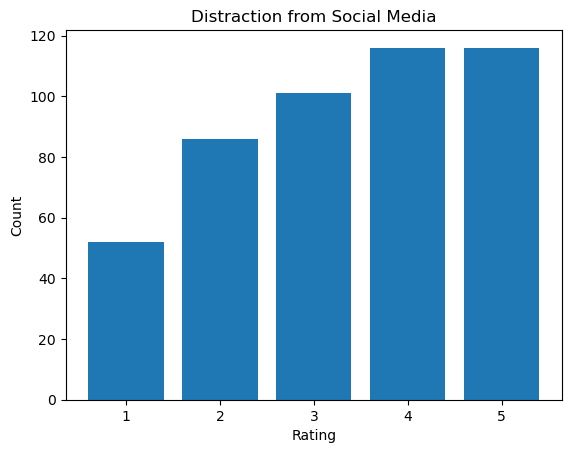

In [98]:
# Create a dataframe that represents how often people get distracted by Social Media
distraction_occurrence = main_df['10. How often do you get distracted by Social media when you are busy doing something?']
ratings = ['1', '2', '3', '4', '5']

# Display the information via bar chart
dist_count = distraction_occurrence.value_counts().sort_index()
plt.bar(ratings, dist_count)
plt.title('Distraction from Social Media')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('output_data/distraction/distraction_demographics')
plt.show

In [99]:
# Find the standard mean of the dataset for distraction level:
mean_distraction = main_df['10. How often do you get distracted by Social media when you are busy doing something?'].mean()
mean_distraction

3.335456475583864

## Age 

- One of the findings we observed when performing statistical testing on Age and Distraction Ratings is that there is a weak negative correlation between age and distraction (-0.2192). From the 'Distraction Ratings by Age Group' line chart, we observed the patterns of each rating as age increases. In Age Groups 10-19 and 25-29 where the population was approximately similar, the results of the ratings were vastly different. People in the older age group of 25-29 were more likely to be distracted than those of belonging 10-19. As the age increases, we see that the distraction rating that represents the most amount of response for ratings decrease. Age groups 30-39 had the most amount of Distraction Ratings 2 compared to other distraction ratings and Age Groups 40-49 and 50-59 had the most ratings being at 1. This supports the  negative correlation that possibly as the age increases, the likelihood of being distracted also decreases. However we do want to take note that it is a weak correlation. 
- Notes: 
     - The distribution among the dataset shows that a significant portion of the population are made up by people in their early 20s, specifically 58% are represented by people from ages 20-24. Since the data is skewed towards this particular age group, further testing and analysis needs to be conducted to support the findings. 

In [100]:
# Create age dataframe: Q10
age_dist_group = main_df.groupby(['Age Groups', '10. How often do you get distracted by Social media when you are busy doing something?'])
age_dist_count = age_dist_group.size().reset_index(name='Rating Count per Age Group')
age_dist_count.head()

,Age Groups,10. How often do you get distracted by Social media when you are busy doing something?,Rating Count per Age Group
0,0-9,1,0
1,0-9,2,0
2,0-9,3,0
3,0-9,4,0
4,0-9,5,0


In [101]:
# Show info on pivot table for Q10
age_dist_pt = age_dist_count.pivot(index='Age Groups', columns='10. How often do you get distracted by Social media when you are busy doing something?', values='Rating Count per Age Group')

# Calculate Total 
age_dist_pt['Total'] = age_dist_pt.sum(axis=1)
age_dist_pt.loc['Total'] = age_dist_pt.sum(axis=0)
age_dist_pt

10. How often do you get distracted by Social media when you are busy doing something?,1,2,3,4,5,Total
Age Groups,,,,,,
0-9,0,0,0,0,0,0
10-19,6,9,13,14,9,51
20-24,19,46,59,76,74,274
25-29,3,8,9,14,21,55
30-39,5,9,7,7,7,35
40-49,14,9,10,5,3,41
50-59,5,4,2,0,0,11
60-95,0,1,1,0,2,4
Total,52,86,101,116,116,471


In [102]:
# Drop total ratings from Pivot Table before plotting
age_dist_pt = age_dist_pt.drop('Total', axis=0)
age_dist_pt = age_dist_pt.drop('Total', axis=1)

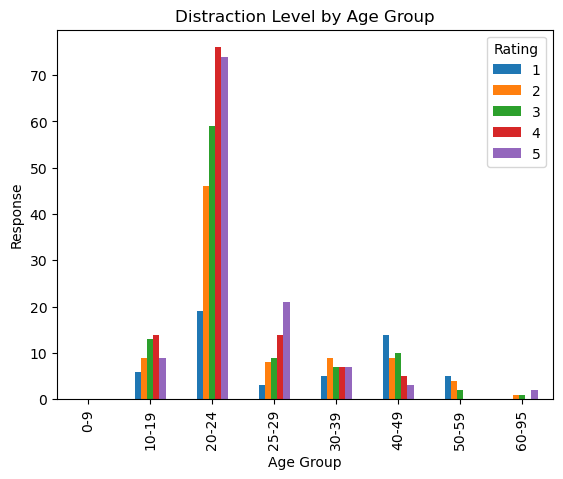

In [103]:
# Plot Age Distribution Ratings for Distraction
age_dist_pt.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Age Group')
plt.ylabel('Response')
plt.title('Distraction Level by Age Group')

# Show the legend
plt.legend(title = 'Rating', loc='upper right', bbox_to_anchor=(1, 1))

# Save output
plt.savefig('output_data/distraction/Distraction_Age_Distribution')

# Show the chart
plt.show()

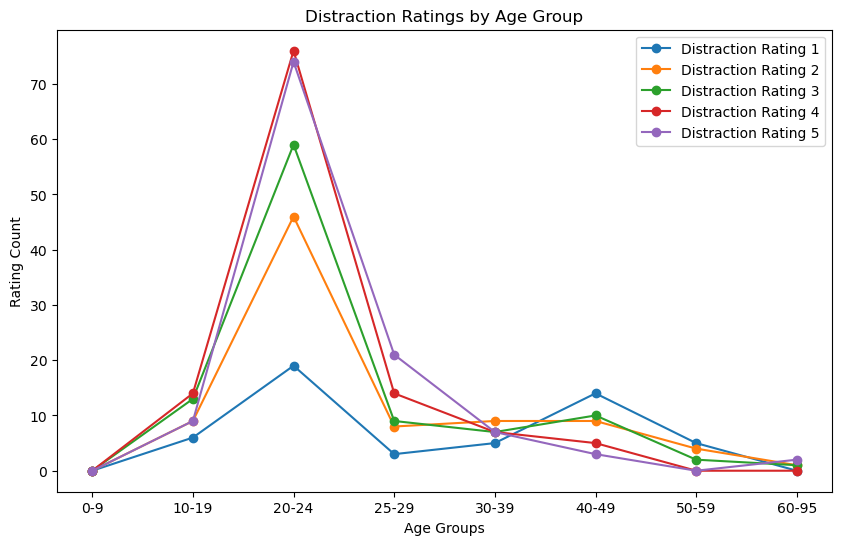

In [104]:
# Create a chart to show existing trends
# Get the age groups
age_groups = age_dist_pt.index.tolist()

# Set the x-axis values
x_age = range(len(age_groups))

# Plot the trend chart
plt.figure(figsize=(10, 6))
for rating in age_dist_pt.columns:
    plt.plot(x_age, age_dist_pt[rating], marker='o', label=f'Distraction Rating {rating}')

# Set x-axis labels
plt.xticks(x_age, age_groups)

# Set axis labels and title
plt.xlabel('Age Groups')
plt.ylabel('Rating Count')
plt.title('Distraction Ratings by Age Group')

# Show the legend
plt.legend()

# Save output
plt.savefig('output_data/distraction/Distraction_Age_Trend')

# Show the chart
plt.show()

In [105]:
# Find correlation coefficient
distraction_ratings = age_dist_pt.columns
age_groups = ['0-9', '10-19', '20-24', '25-29', '30-39', '40-49', '50-59', '60-95']

# Create empty lists to store the data
age_x_values = []
age_y_values = []

# Extract information from pivot table
for i, age_group in enumerate(age_groups):
    for rating in distraction_ratings:
        count = age_dist_pt.loc[age_group, rating]
        age_x_values.extend([i] * count)  # Assign numerical values to age groups
        age_y_values.extend([float(rating)] * count)

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(age_x_values, age_y_values)

# Print the correlation coefficient
print(f"Pearson's correlation coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson's correlation coefficient: -0.2192
P-value: 0.0000


## Gender 

- From the pie charts, we can see that the distribution of ratings based on gender categories are not too different from each other. Specifically, the makeup of the ratings between both male and female groups are extremely similar from one another with rating 1 being the smallest. The only difference between the two charts is that the largest makeup for females was rating 5 and for male it was rating 4. The correlation coefficient (-0.0685) showed that there was an extremely weak negative correlation between gender and distraction ratings. As the p-value was 0.1379, it supports that the correlation is not statistically significant. We also performed statistical testing that compared the results of female and male distraction ratings. The p-value is 0.0690 indicates that there is no significant difference between the two groups. This supports the visualization provided by the pie charts

- Notes:
    - As the "Others" category (1.5%) was disproportional compared to the representation of people that made up of Female and Male categories, it was excluded from being tested against them. Therefore the t test was only performed on the female and male groups comparing the two. 

In [106]:
# Create dataframe for gender - Q10 
gender_dist_group = main_df.groupby(['2. Gender', '10. How often do you get distracted by Social media when you are busy doing something?'])
gender_dist_count = gender_dist_group.size().reset_index(name='Rating Count per Gender')
gender_dist_count.head()

,2. Gender,10. How often do you get distracted by Social media when you are busy doing something?,Rating Count per Gender
0,Female,1,24
1,Female,2,47
2,Female,3,55
3,Female,4,61
4,Female,5,72


In [107]:
# Show info on pivot table for Q10
gender_dist_pt = gender_dist_count.pivot(index='2. Gender', columns='10. How often do you get distracted by Social media when you are busy doing something?', values='Rating Count per Gender')

# Calculate Total 
gender_dist_pt['Total'] = gender_dist_pt.sum(axis=1)
gender_dist_pt.loc['Total'] = gender_dist_pt.sum(axis=0)
gender_dist_pt

10. How often do you get distracted by Social media when you are busy doing something?,1,2,3,4,5,Total
2. Gender,,,,,,
Female,24,47,55,61,72,259
Male,27,38,45,53,42,205
Others,1,1,1,2,2,7
Total,52,86,101,116,116,471


In [108]:
# Drop total ratings from Pivot Table before plotting
gender_dist_pt = gender_dist_pt.drop('Total', axis=0)
gender_dist_pt = gender_dist_pt.drop('Total', axis=1)

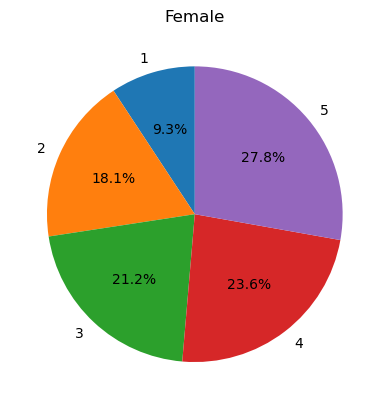

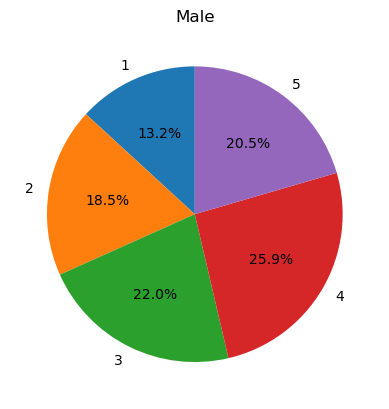

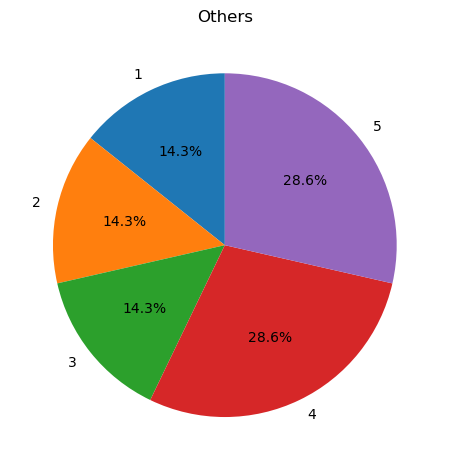

In [109]:
# Get how many gender categories there are
gender_count = len(gender_dist_pt)

# Create separate pie charts for each gender
for gender in gender_dist_pt.index:
    data = gender_dist_pt.loc[gender]
    plt.figure()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    plt.title(gender)
    
plt.savefig('output_data/distraction/Distraction_Gender_Distribution')
plt.tight_layout()
plt.show()

In [110]:
# Find correlation coefficient between ratings and gender differences
distraction_ratings = gender_dist_pt.columns
genders = gender_dist_pt.index

# Create empty lists to store the data
gender_x_values = []
gender_y_values = []

# Extract information from pivot table
for i, gender in enumerate(genders):
    for rating in distraction_ratings:
        count = gender_dist_pt.loc[gender, rating]
        gender_x_values.extend([i] * count)  # Assign numerical values to genders
        gender_y_values.extend([float(rating)] * count)

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(gender_x_values, gender_y_values)

# Print the correlation coefficient
print(f"Pearson's correlation coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson's correlation coefficient: -0.0685
P-value: 0.1379


In [111]:
# Perform a one-sample t-test for each gender category
for gender in gender_dist_pt.index:
    ratings = gender_dist_pt.loc[gender].values[1:]  # Exclude the first column (gender category)
    t_statistic, p_value = stats.ttest_1samp(ratings, mean_distraction)
    print(f"One-sample t-test for {gender}:")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print()

One-sample t-test for Female:
T-statistic: 10.5234
P-value: 0.0018

One-sample t-test for Male:
T-statistic: 12.9635
P-value: 0.0010

One-sample t-test for Others:
T-statistic: -6.3582
P-value: 0.0079



In [112]:
# Extract the distraction ratings for Female and Male from the pivot table
ratings_female = gender_dist_pt.loc['Female'][1:6]
ratings_male = gender_dist_pt.loc['Male'][1:6]

# Run the two-sample t-test
t_statistic, p_value = stats.ttest_ind(ratings_female, ratings_male, equal_var=False)

print("Two-sample t-test results:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Two-sample t-test results:
T-statistic: 2.3174
P-value: 0.0690


## Average Time Spent on Social Media

- The distribution across the 3 categories of average time spent on social media (0-3 hours, 3-5 hours, and 5+ hours) is more proportionate compared to the previous factors studied. The correlation coefficient at 0.29 suggests that there is a moderate positive correlation between average time spent and how easily distracted people are by social media. This suggests that there is some sort of tendency that people who spends more time on social media will experience higher levels of distraction. This is supported by the 'Distraction Level by Average Time Spent' chart, where people who spent 5+ hours on social media had the most ratings for being extremely distracted (5) where as people who spent 0-3 hours on social media had a relative uniformity across all ratings. From one group of average time spent to the next, there is an increasing trend of higher ratings as more time is spent on social media.
- There are various factors that could play a role in the relationship between how much time one spends on social media and how easily they are distracted by it. Eenvironmental and individual differences are factors that could play a role in how easily one becomes distracted by social media. Therefore, more research needs to be conducted to have a comprehensive understanding of the relationship between average time spent on social media and the level of distraction one is influenced by social media

In [113]:
# Create dataframe for time - Q10 
time_dist_group = main_df.groupby(['Average Time on Social Media', '10. How often do you get distracted by Social media when you are busy doing something?'])
time_dist_count = time_dist_group.size().reset_index(name='Rating Count per Avg Time')
time_dist_count.head()

,Average Time on Social Media,10. How often do you get distracted by Social media when you are busy doing something?,Rating Count per Avg Time
0,0-3 hours,1,37
1,0-3 hours,2,50
2,0-3 hours,3,38
3,0-3 hours,4,45
4,0-3 hours,5,27


In [114]:
# Show info on pivot table for Q10
time_dist_pt = time_dist_count.pivot(index='Average Time on Social Media', columns='10. How often do you get distracted by Social media when you are busy doing something?', values='Rating Count per Avg Time')

# Calculate Total 
time_dist_pt['Total'] = time_dist_pt.sum(axis=1)
time_dist_pt.loc['Total'] = time_dist_pt.sum(axis=0)
time_dist_pt

10. How often do you get distracted by Social media when you are busy doing something?,1,2,3,4,5,Total
Average Time on Social Media,,,,,,
0-3 hours,37,50,38,45,27,197
3-5 hours,10,19,43,42,44,158
5+ hours,5,17,20,29,45,116
Total,52,86,101,116,116,471


In [115]:
# Drop total ratings from Pivot Table before plotting
time_dist_pt = time_dist_pt.drop('Total', axis=0)
time_dist_pt = time_dist_pt.drop('Total', axis=1)

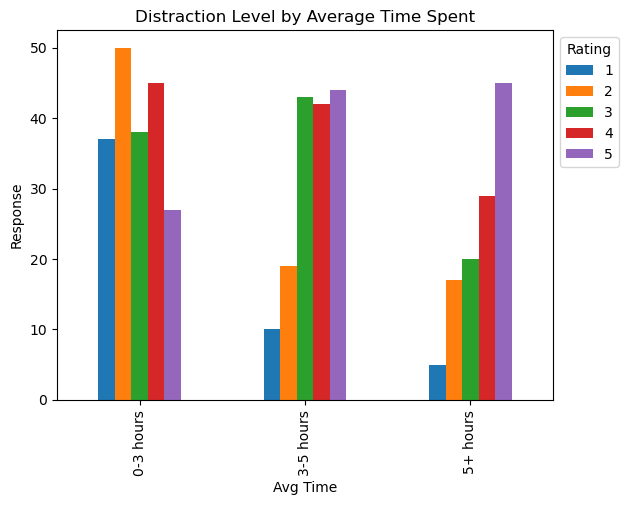

In [116]:
# Plot Time Distribution Ratings for Distraction
time_dist_pt.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Avg Time')
plt.ylabel('Response')
plt.title('Distraction Level by Average Time Spent')

# Plot the legend
plt.legend(title = 'Rating', loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure
plt.savefig('output_data/distraction/Distraction_Average_Time_Spent')


In [117]:
# Find correlation coefficient between average time on social media and distraction rating
distraction_ratings = time_dist_pt.columns
average_times = time_dist_pt.index

# Create empty lists to store the data
time_x_values = []
time_y_values = []

# Extract information from pivot table
for i, time_category in enumerate(average_times):
    for rating in distraction_ratings:
        count = time_dist_pt.loc[time_category, rating]
        time_x_values.extend([i] * count)  # Assign numerical values to average time categories
        time_y_values.extend([float(rating)] * count)

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(time_x_values, time_y_values)

# Print the correlation coefficient
print(f"Pearson's correlation coefficient: {correlation_coefficient:.4f}")

Pearson's correlation coefficient: 0.2910


## Occupation

- There is a weak positive correlation between the occupation and distraction at 0.2233. From the 'Distraction Level by Occupation' chart, university students are more prone to experiencing higher levels of distraction. as opposed to salaried workers, school students, and retired people. In the case of salaried workers, distraction levels of 4 and 5 were lower than the other 3 distraction ratings compared to students. This suggests that maybe due to the nature of their work environment, time availability, and work/stress levels, salaried workers could potentially have more job responsibilities that require less time for them to go on social media. 
- Because University students overrepresent the data, the statistical findings could be skewed. Therefore, additional testing needs to be conducted to understand the nature of occupation. For instance, salaried workers could also be separated into different categories depending on the type of work they do. This would provide further analysis on how occupation plays a role in distraction levels by social media. However, the given dataset doesn't have that information.

In [118]:
# Create dataframe for occupation - Q10 
occupation_dist_group = main_df.groupby(['4. Occupation Status', '10. How often do you get distracted by Social media when you are busy doing something?'])
occupation_dist_count = occupation_dist_group.size().reset_index(name='Rating Count per Occupation')
occupation_dist_count.head()

,4. Occupation Status,10. How often do you get distracted by Social media when you are busy doing something?,Rating Count per Occupation
0,Retired,1,2
1,Retired,2,1
2,Retired,3,1
3,Retired,4,1
4,Retired,5,3


In [119]:
# Show info on pivot table for Q10
occupation_dist_pt = occupation_dist_count.pivot(index='4. Occupation Status', columns='10. How often do you get distracted by Social media when you are busy doing something?', values='Rating Count per Occupation')

# Calculate Total 
occupation_dist_pt['Total'] = occupation_dist_pt.sum(axis=1)
occupation_dist_pt.loc['Total'] = occupation_dist_pt.sum(axis=0)
occupation_dist_pt

10. How often do you get distracted by Social media when you are busy doing something?,1,2,3,4,5,Total
4. Occupation Status,,,,,,
Retired,2,1,1,1,3,8
Salaried Worker,27,27,29,21,20,124
School Student,6,8,10,16,9,49
University Student,17,50,61,78,84,290
Total,52,86,101,116,116,471


In [120]:
# Drop total ratings from Pivot Table before plotting
occupation_dist_pt = occupation_dist_pt.drop('Total', axis=0)
occupation_dist_pt = occupation_dist_pt.drop('Total', axis=1)

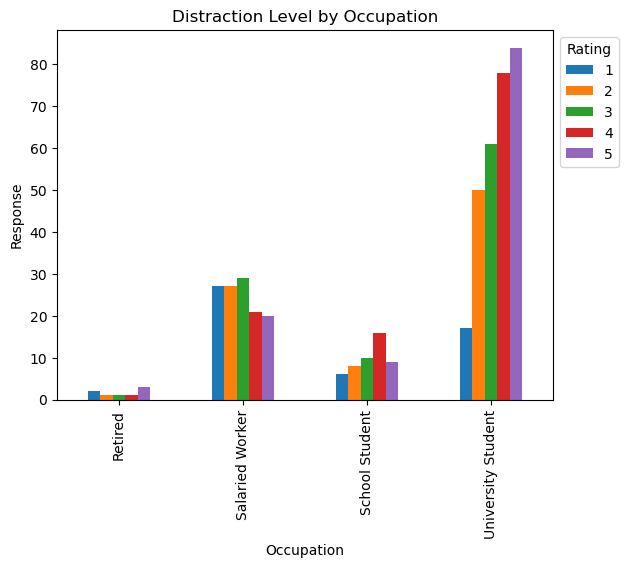

In [121]:
# Plot Distraction Rating by Occupation
occupation_dist_pt.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Occupation')
plt.ylabel('Response')
plt.title('Distraction Level by Occupation')

# Plot legend
plt.legend(title= 'Rating', loc='upper left', bbox_to_anchor=(1, 1))

# Save figure
plt.savefig('output_data/distraction/distraction_by_occupation')

# Show plot
plt.show()

In [122]:
# Find correlation coefficient between occupation and distraction rating
distraction_ratings = occupation_dist_pt.columns
occupations = occupation_dist_pt.index

# Create empty lists to store the data
occupation_x_values = []
occupation_y_values = []

# Extract information from pivot table
for i, occupation in enumerate(occupations):
    for rating in distraction_ratings:
        count = occupation_dist_pt.loc[occupation, rating]
        occupation_x_values.extend([i] * count)  # Assign numerical values to occupations
        occupation_y_values.extend([float(rating)] * count)

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(occupation_x_values, occupation_y_values)

# Print the correlation coefficient
print(f"Pearson's correlation coefficient: {correlation_coefficient:.4f}")

Pearson's correlation coefficient: 0.2233


## Age Groups and Average Times on Social Media

- We can assume that there is almost no correlation between age and average time spent on social media for distraction depending on the p value being at 0.8406 and the correlation coefficient at 0.02. 

- Based on the heatmap 'Distraction Rating by Age Group and Average Time on Social Media', we can observe that the people from ages 40-49 and 60-95 have the highest average distraction ratings as they spend 5+ hours on social media. In comparison, the youngest age group (10-19) shows lower average distraction ratings across all time averages spent on social media. Because age group 50-59 have missing values(NaN) in the 5+ hours category, there is a lack of information to compare this data set with other age groups.

In [123]:
main_df_copy = main_df.copy()
main_df_copy.loc[:, 'Average Time on Social Media'] = main_df_copy['Average Time on Social Media'].astype(str)
age_avg_time_dist = main_df_copy.groupby(['Age Groups', 'Average Time on Social Media'])['10. How often do you get distracted by Social media when you are busy doing something?'].mean().reset_index()
age_avg_time_dist

,Age Groups,Average Time on Social Media,10. How often do you get distracted by Social media when you are busy doing something?
0,0-9,0-3 hours,NaN
1,0-9,3-5 hours,NaN
2,0-9,5+ hours,NaN
3,10-19,0-3 hours,2.600000
4,10-19,3-5 hours,3.375000
5,10-19,5+ hours,3.666667
6,20-24,0-3 hours,3.322222
7,20-24,3-5 hours,3.530612
8,20-24,5+ hours,3.686047
9,25-29,0-3 hours,3.095238


In [124]:
# Show info on pivot table for Q10
age_time_pt = main_df_copy.pivot_table(index='Age Groups', columns='Average Time on Social Media', values='10. How often do you get distracted by Social media when you are busy doing something?', aggfunc='mean')
age_time_pt = age_time_pt.sort_index()

# Calculate Total Mean
age_time_pt['Total Average'] = age_time_pt.mean(axis=1)
age_time_pt.loc['Total Average'] = age_time_pt.mean(axis=0)
age_time_pt

Average Time on Social Media,0-3 hours,3-5 hours,5+ hours,Total Average
Age Groups,,,,
10-19,2.600000,3.375000,3.666667,3.213889
20-24,3.322222,3.530612,3.686047,3.512960
25-29,3.095238,4.050000,4.357143,3.834127
30-39,2.720000,3.875000,4.000000,3.531667
40-49,2.117647,3.333333,5.000000,3.483660
50-59,1.600000,3.000000,NaN,2.300000
60-95,3.500000,3.000000,5.000000,3.833333
Total Average,2.707872,3.451992,4.284976,3.387091


In [125]:
# Drop total ratings from Pivot Table before plotting
age_time_pt = age_time_pt.drop('Total Average', axis=0)
age_time_pt = age_time_pt.drop('Total Average', axis=1)

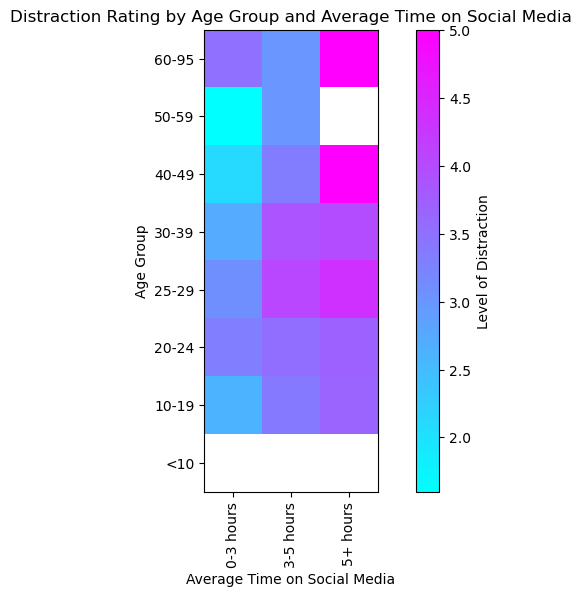

In [126]:
# Sort by age order
age_order = ['60-95','50-59', '40-49', '30-39', '25-29','20-24', '10-19', '<10' ]
age_time_pt = age_time_pt.reindex(age_order)

# Get the tick labels for x-axis and y-axis
x_ticks = age_time_pt.columns
y_ticks = age_time_pt.index

# Create the heatmap
heatmap= age_time_pt.values

plt.figure(figsize=(10, 6))
plt.imshow(heatmap, cmap='cool')
cbar = plt.colorbar()
cbar.set_label('Level of Distraction')

# Set ticks
plt.xticks(np.arange(len(x_ticks)), x_ticks)
plt.yticks(np.arange(len(y_ticks)), y_ticks)

plt.xticks(rotation=90)

# Set axis labels and title
plt.xlabel('Average Time on Social Media')
plt.ylabel('Age Group')
plt.title('Distraction Rating by Age Group and Average Time on Social Media')

#Save figure
plt.savefig('output_data/distraction/Age_Time_Distraction_Heatmap')

plt.show()

In [127]:
# Extract information from pivot table
age_groups = age_time_pt.index.tolist()
average_times = age_time_pt.columns.tolist()

age_x_values = []
age_y_values = []

for i, age_group in enumerate(age_groups):
    for j, average_time in enumerate(average_times):
        rating = age_time_pt.loc[age_group, average_time]
        if pd.notnull(rating):  # Check for NaN values
            rating_int = int(rating)  # Convert the rating to an integer
            age_x_values.extend([i] * rating_int)  # Assign numerical values to age groups
            age_y_values.extend([j] * rating_int)  # Assign numerical values to average time

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(age_x_values, age_y_values)

# Print the correlation coefficient
print(f"Pearson's correlation coefficient between Average Time on Social Media and Age Groups: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson's correlation coefficient between Average Time on Social Media and Age Groups: -0.0334
P-value: 0.7965


## Occupation and Average Time on Social Media

- There is a weak negative correlation between occupation and average time spent on social media based on distraction ratings. Since the correlation coefficient is at -0.1919, there is a slight tendency that people with different occupations tend to spend different times on social media. Because the p-value is at 0.2623 we fail to reject the null hypothesis that there is no correlation between the Average Time on Social Media and the Occupation. However, further testing needs to be conducted to determine different occupation impact the average time spent on social media and how distracted they are from social media based on these two factors.
- The heatmap 'Distraction Rating by Occupation and Average Time on Social Media' portrays that retired workers have a tendency to spend more time on social media, which suggest they are more likely to be distractedby social media. However given that the population that is represented by retired workers is at 1.7%, there is too little data to suggest the accuracy of this result. On the other hand, school students and salaried workers have higher distraction ratings as they spend more time on social media. In comparison, university students show a relatively consistent distraction ratings across the different average times spent on social media. 

In [128]:
# Create data frame
occ_avg_time_dist = main_df_copy.groupby(['4. Occupation Status', 'Average Time on Social Media'])['10. How often do you get distracted by Social media when you are busy doing something?'].mean().reset_index()
occ_avg_time_dist

,4. Occupation Status,Average Time on Social Media,10. How often do you get distracted by Social media when you are busy doing something?
0,Retired,0-3 hours,1.333333
1,Retired,3-5 hours,4.250000
2,Retired,5+ hours,5.000000
3,Salaried Worker,0-3 hours,2.416667
4,Salaried Worker,3-5 hours,3.480000
5,Salaried Worker,5+ hours,4.133333
6,School Student,0-3 hours,2.823529
7,School Student,3-5 hours,3.500000
8,School Student,5+ hours,3.583333
9,University Student,0-3 hours,3.344086


In [129]:
# Show info on pivot table for Q10
occ_time_pt = main_df.pivot_table(index='4. Occupation Status', columns='Average Time on Social Media', values='10. How often do you get distracted by Social media when you are busy doing something?', aggfunc='mean')
occ_time_pt = occ_time_pt.sort_index()

# Calculate Total Mean
occ_time_pt['Total Average'] = occ_time_pt.mean(axis=1)
occ_time_pt.loc['Total Average'] = occ_time_pt.mean(axis=0)
occ_time_pt

Average Time on Social Media,0-3 hours,3-5 hours,5+ hours,Total Average
4. Occupation Status,,,,
Retired,1.333333,4.250000,5.000000,3.527778
Salaried Worker,2.416667,3.480000,4.133333,3.343333
School Student,2.823529,3.500000,3.583333,3.302288
University Student,3.344086,3.587156,3.750000,3.560414
Total Average,2.479404,3.704289,4.116667,3.433453


In [130]:
# Drop total ratings from Pivot Table before plotting
occ_time_pt = occ_time_pt.drop('Total Average', axis=0)
occ_time_pt = occ_time_pt.drop('Total Average', axis=1)

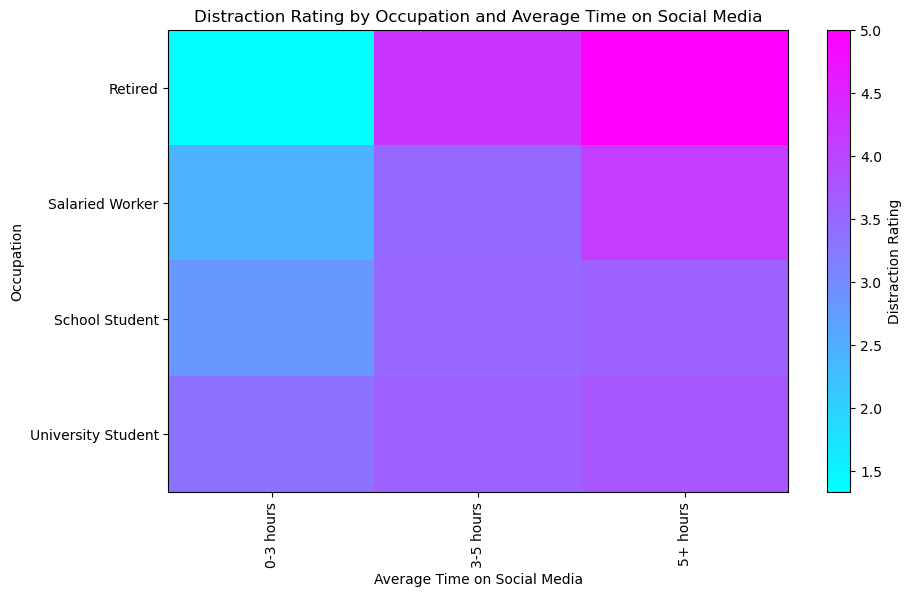

In [131]:
# Sort the index
occ_time_pt = occ_time_pt.sort_index()

# Get the tick labels for x-axis and y-axis
x_ticks = occ_time_pt.columns
y_ticks = occ_time_pt.index

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(occ_time_pt, cmap='cool', aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Distraction Rating')

# Set ticks
plt.xticks(range(len(x_ticks)), x_ticks, rotation=90)
plt.yticks(range(len(y_ticks)), y_ticks)

# Set axis labels and title
plt.xlabel('Average Time on Social Media')
plt.ylabel('Occupation')
plt.title('Distraction Rating by Occupation and Average Time on Social Media')

# Save fig
plt.savefig('output_data/distraction/occupation_time_distraction')

plt.show()

In [132]:
# Extract information from pivot table
occupations = occ_time_pt.index.tolist()
average_times = occ_time_pt.columns.tolist()

occupation_x_values = []
occupation_y_values = []

for i, occupation in enumerate(occupations):
    for j, average_time in enumerate(average_times):
        rating = occ_time_pt.loc[occupation, average_time]
        if pd.notnull(rating):  # Check for NaN values
            rating_int = int(rating)  # Convert the rating to an integer
            occupation_x_values.extend([i] * rating_int)  # Assign numerical values to occupations
            occupation_y_values.extend([j] * rating_int)  # Assign numerical values to average time

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(occupation_x_values, occupation_y_values)

# Print the correlation coefficient and p-value
print(f"Pearson's correlation coefficient between Average Time on Social Media and Occupation: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson's correlation coefficient between Average Time on Social Media and Occupation: -0.1919
P-value: 0.2623


# Collection of App Usage vs Mental Health

## Does a specific SM platform or collection of platforms lead to more issues than others? 

- The most common Social Media Platform among the surveyed data were Facebook, Instagram, YouTube.
- Facebook and Instagram can be associated for comparison that may be leading to negative emotions.
- We do not have specific data regarding how a distinct platform makes the recipient feel. Deducing the data to one recorded platform from the top 3 did not lead to enough information for a conclusion.
- Users in this sample tend to use more than one platform along with the top three most popular recorded.

## Whether a collection of app platform usage leads to more of an impact on mental health?
- The distribution among the dataset had on average 3-5 social media platforms. More specifically on average 4 platforms.
- The Average Total Frequency Score saw an increase of 12% from the 1-2 social media platform group to 3-5 group which is a minor increase. Which may suggest multiple platforms can lead to more of an impact on attention throughout the day when engaging in multiple platforms. 
- The 1-2 Social Media Platform group also had on average an hour less spent on social media than the 3-5 and 6+ platform groups.

In [133]:
#Remove Timestamp; do not really need
socialApps_df = main_df.iloc[:, 1:]
socialApps_df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,...,"13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Average Time on Social Media,Age Groups
0,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,3,...,2,5,2,3,2,5,4,5,0-3 hours,20-24
1,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,3,...,5,4,5,1,1,5,4,5,5+ hours,20-24
2,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,2,...,5,4,3,3,1,4,2,5,3-5 hours,20-24
3,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,2,...,5,3,5,1,2,4,3,2,5+ hours,20-24
4,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,5,...,5,5,3,3,3,4,4,1,0-3 hours,20-24


In [134]:
#Get Number of Social Apps into a List
appsList = socialApps_df.iloc[:, 6]

#Creating a variable to store # amount of apps
numberOfApps = []

#Creating a variable to store list of the split result string list
listOfApps = []

for app in appsList:
    listOfApps.append(app.split(";"))

In [135]:
#Add Number of Apps to DF

listOfNumberApps = [len(x) for x in listOfApps]

#Add to social apps df
socialApps_df['Number of Apps'] = listOfNumberApps

In [136]:
#Rename columns to respective type of question.
socialApps_df.rename(columns = {'9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q2',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)


In [137]:
# Custom app ranges
appBins = [1, 2, 5, 20]

# Labels for the app groups
appLabels = ['1-2', '3-5', '6+']  

#Bin the new groups
socialApps_df['App Groups'] = pd.cut(socialApps_df['Number of Apps'], bins=appBins, labels=appLabels,include_lowest=True)

In [138]:
socialApps_df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,ADHD Q1,ADHD Q2,...,Self Esteem Q1,"16. Following the previous question, how do you feel about these comparisons, generally speaking?",Self Esteem Q2,Depression Q1,Depression Q2,Depression Q3,Average Time on Social Media,Age Groups,Number of Apps,App Groups
0,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,3,...,2,3,2,5,4,5,0-3 hours,20-24,6,6+
1,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,3,...,5,1,1,5,4,5,5+ hours,20-24,6,6+
2,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,2,...,3,3,1,4,2,5,3-5 hours,20-24,4,3-5
3,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,2,...,5,1,2,4,3,2,5+ hours,20-24,2,1-2
4,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,5,...,3,3,3,4,4,1,0-3 hours,20-24,3,3-5


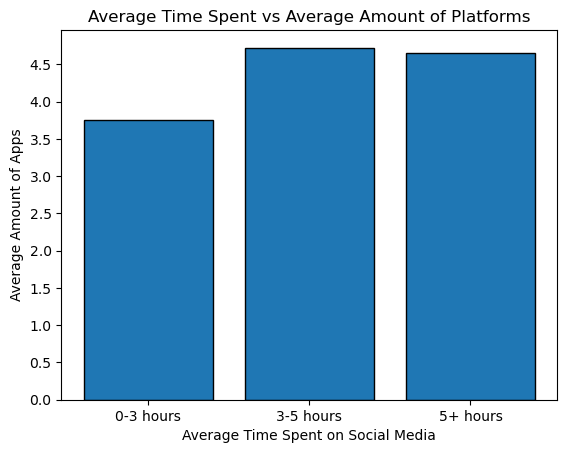

Average Time on Social Media
0-3 hours    3.756345
3-5 hours    4.721519
5+ hours     4.655172
Name: Number of Apps, dtype: float64

In [139]:
#Create a chart to detail time spent on social media vs amount of platforms
statSummary = socialApps_df.groupby('Average Time on Social Media')

averageNumberOfApps = statSummary['Number of Apps'].mean()

plt.bar(averageNumberOfApps.index, averageNumberOfApps, edgecolor='black')
plt.xlabel("Average Time Spent on Social Media")
plt.ylabel("Average Amount of Apps")
plt.title('Average Time Spent vs Average Amount of Platforms')
plt.yticks(np.arange(0,5,step=0.5))
plt.show()
averageNumberOfApps

In [140]:
from collections import Counter

#Flatten List of lists ex: ([["A"], ["B"], ["C"]] = ["A", "B", "C"])
appsTotalList = [item for sublist in listOfApps for item in sublist]

#Count total amount of recorded platforms
recordedAppsTotal = Counter(appsTotalList)

#Create into DF
recordedAppsTotal_df = pd.DataFrame.from_dict(recordedAppsTotal, orient='index', columns=["Total"])

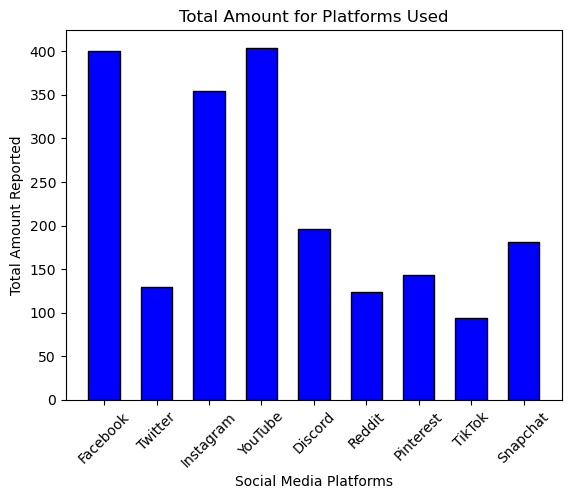

,Total
Facebook,400
Twitter,130
Instagram,354
YouTube,404
Discord,196
Reddit,124
Pinterest,143
TikTok,94
Snapchat,181


In [141]:
#Plot the recorded results of platforms
plt.bar(recordedAppsTotal_df.index, recordedAppsTotal_df['Total'], width=0.6, align='center', color='blue', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Total Amount for Platforms Used')
plt.ylabel('Total Amount Reported')
plt.xlabel('Social Media Platforms')
plt.show()
recordedAppsTotal_df

In [142]:
#Create a column for ADHD Total questions, 4 Question total (20 points Max)
socialApps_df['ADHD Total Score'] = socialApps_df['ADHD Q1'] + socialApps_df['ADHD Q2'] + socialApps_df['ADHD Q3'] + socialApps_df['ADHD Q4']

#Create a column for Self Esteem Total questions, 2 Question total (10 points Max)
socialApps_df['Self Esteem Total Score'] = socialApps_df['Self Esteem Q1'] + socialApps_df['Self Esteem Q2']

#Create a column for Anxiety Total questions, 2 Question total (10 points Max)
socialApps_df['Anxiety Total Score'] = socialApps_df['Anxiety Q1'] + socialApps_df['Anxiety Q2']

#Create a column for Depression total questions, 3 Question total (15 points Max)
socialApps_df['Depression Total Score'] = socialApps_df['Depression Q1'] + socialApps_df['Depression Q2'] + socialApps_df['Depression Q3']

#Create a column for Total Amount of questions, 11 Question total (55 points Max)
socialApps_df['Total Score'] = socialApps_df['ADHD Total Score'] + socialApps_df['Self Esteem Total Score'] + socialApps_df['Anxiety Total Score'] + socialApps_df['Depression Total Score']


In [143]:
#Filter for specific platform of the top 3, Facebook
filtered_list = []
for index, row in socialApps_df.iterrows():
    temp = row['7. What social media platforms do you commonly use?'].split()
    if 'Facebook' in temp and len(temp) == 1:
        filtered_list.append(row)
filtered_df = pd.DataFrame(filtered_list)
filtered_df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,ADHD Q1,ADHD Q2,...,Depression Q3,Average Time on Social Media,Age Groups,Number of Apps,App Groups,ADHD Total Score,Self Esteem Total Score,Anxiety Total Score,Depression Total Score,Total Score
52,26.0,Male,Single,University Student,University,Yes,Facebook,Less than an Hour,3,5,...,5,0-3 hours,25-29,1,1-2,18,10,8,15,51
115,34.0,Female,Married,Salaried Worker,School,Yes,Facebook,More than 5 hours,5,5,...,4,5+ hours,30-39,1,1-2,16,6,7,11,40
117,22.0,Female,Single,University Student,University,Yes,Facebook,More than 5 hours,5,4,...,4,5+ hours,20-24,1,1-2,17,7,10,10,44
133,38.0,Female,Married,Salaried Worker,School,Yes,Facebook,Less than an Hour,3,2,...,1,0-3 hours,30-39,1,1-2,8,4,5,4,21
145,47.0,Female,Married,Salaried Worker,Private,Yes,Facebook,Between 1 and 2 hours,4,4,...,3,0-3 hours,40-49,1,1-2,13,7,5,9,34


In [144]:
#Filter for specific platform of the top 3, Instagram
filtered_list_in = []
for index, row in socialApps_df.iterrows():
    temp = row['7. What social media platforms do you commonly use?'].split()
    if 'Instagram' in temp and len(temp) == 1:
        filtered_list_in.append(row)
filteredIn_df = pd.DataFrame(filtered_list_in)
filteredIn_df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,ADHD Q1,ADHD Q2,...,Depression Q3,Average Time on Social Media,Age Groups,Number of Apps,App Groups,ADHD Total Score,Self Esteem Total Score,Anxiety Total Score,Depression Total Score,Total Score
94,30.0,Female,Single,Salaried Worker,University,Yes,Instagram,Between 4 and 5 hours,4,5,...,4,3-5 hours,30-39,1,1-2,15,6,7,12,40
102,22.0,Male,Single,University Student,University,Yes,Instagram,Between 3 and 4 hours,3,4,...,3,3-5 hours,20-24,1,1-2,13,5,7,10,35
124,22.0,Female,Single,University Student,University;N/A,Yes,Instagram,More than 5 hours,5,5,...,1,5+ hours,20-24,1,1-2,16,8,5,6,35
189,21.0,Female,In a relationship,University Student,University,Yes,Instagram,Between 2 and 3 hours,5,5,...,5,0-3 hours,20-24,1,1-2,20,7,6,12,45
214,20.0,Female,In a relationship,University Student,NaN,Yes,Instagram,More than 5 hours,3,3,...,1,5+ hours,20-24,1,1-2,12,7,6,10,35


In [145]:
#Filter for specific platform of the top 3, YouTube
filtered_list_yt = []
for index, row in socialApps_df.iterrows():
    temp = row['7. What social media platforms do you commonly use?'].split()
    if 'YouTube' in temp and len(temp) == 1:
        filtered_list_yt.append(row)
filteredYT_df = pd.DataFrame(filtered_list_yt)
filteredYT_df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,ADHD Q1,ADHD Q2,...,Depression Q3,Average Time on Social Media,Age Groups,Number of Apps,App Groups,ADHD Total Score,Self Esteem Total Score,Anxiety Total Score,Depression Total Score,Total Score
42,56.0,Female,Married,Retired,NaN,Yes,YouTube,Between 1 and 2 hours,1,1,...,1,0-3 hours,50-59,1,1-2,4,2,4,6,16
157,36.0,Female,Married,Salaried Worker,School,Yes,YouTube,Between 2 and 3 hours,3,2,...,4,0-3 hours,30-39,1,1-2,11,2,5,6,24
232,25.0,Male,Single,University Student,University,Yes,YouTube,Between 1 and 2 hours,5,5,...,5,0-3 hours,25-29,1,1-2,14,7,3,12,36
267,21.0,Male,Single,University Student,University,Yes,YouTube,Between 2 and 3 hours,3,3,...,4,0-3 hours,20-24,1,1-2,15,4,7,10,36
434,22.0,Female,Single,University Student,University,Yes,YouTube,Between 4 and 5 hours,3,1,...,5,3-5 hours,20-24,1,1-2,9,3,6,12,30


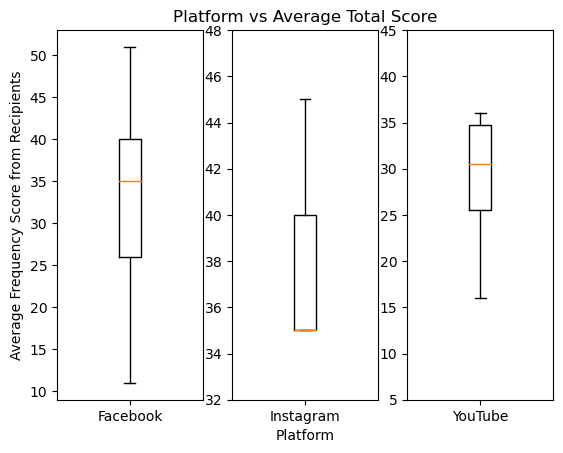

In [146]:
#Plot the individual platform average scores.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.boxplot(filtered_df['Total Score'])
ax2.boxplot(filteredIn_df['Total Score'])
ax3.boxplot(filteredYT_df['Total Score'])
ax1.set_ylabel('Average Frequency Score from Recipients')
ax2.set_xlabel('Platform')
ax2.set_title('Platform vs Average Total Score')
ax1.set_xticklabels(['Facebook'])
ax2.set_xticklabels(['Instagram'])
ax3.set_xticklabels(['YouTube'])
ax2.set_yticks(np.arange(32, 50, step=2))
plt.yticks(np.arange(5, 50, step=5))
plt.show()

In [147]:
#Show columns in social apps
socialApps_df.columns

Index(['1. What is your age?', '2. Gender', '3. Relationship Status',
       '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       'ADHD Q1', 'ADHD Q2', 'Anxiety Q1', 'ADHD Q3', 'Anxiety Q2', 'ADHD Q4',
       'Self Esteem Q1',
       '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
       'Self Esteem Q2', 'Depression Q1', 'Depression Q2', 'Depression Q3',
       'Average Time on Social Media', 'Age Groups', 'Number of Apps',
       'App Groups', 'ADHD Total Score', 'Self Esteem Total Score',
       'Anxiety Total Score', 'Depression Total Score', 'Total Score'],
      dtype='object')

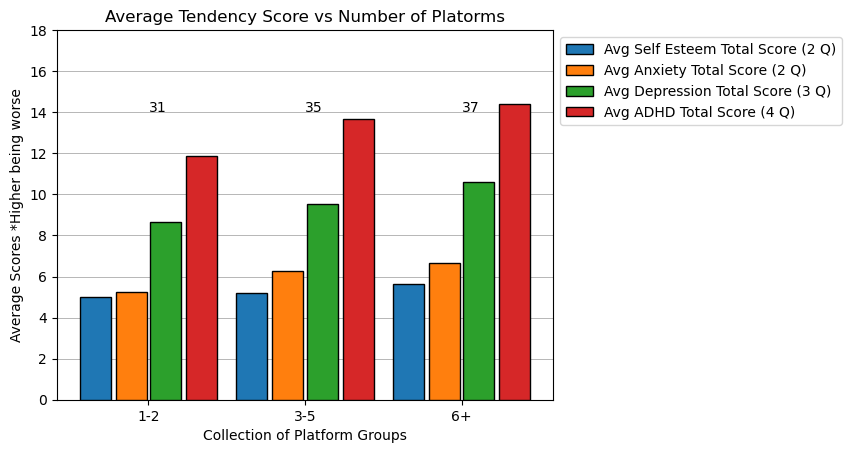

,ADHD Total Score,Self Esteem Total Score,Anxiety Total Score,Depression Total Score,Total Score
App Groups,,,,,
1-2,11.890110,5.010989,5.241758,8.648352,30.791209
3-5,13.671875,5.207031,6.269531,9.554688,34.703125
6+,14.411290,5.637097,6.661290,10.620968,37.330645


In [148]:
#Aggregate Averages for Tendency by Category and Total
totalScoreNumberOfApps = socialApps_df.groupby('App Groups').agg({'ADHD Total Score': 'mean', 'Self Esteem Total Score': 'mean',
       'Anxiety Total Score': 'mean', 'Depression Total Score': 'mean', 'Total Score': 'mean'})

X_axis = np.arange(len(totalScoreNumberOfApps.index))

#Plot the average question type scores amongst the groups
plt.bar(X_axis - 0.34, totalScoreNumberOfApps['Self Esteem Total Score'], width=0.2, edgecolor='black', zorder=3)
plt.bar(X_axis - 0.11, totalScoreNumberOfApps['Anxiety Total Score'], width=0.2, edgecolor='black', zorder=3)
plt.bar(X_axis + 0.11, totalScoreNumberOfApps['Depression Total Score'], width=0.2, edgecolor='black', zorder=3)
plt.bar(X_axis + 0.34, totalScoreNumberOfApps['ADHD Total Score'], width=0.2, edgecolor='black', zorder=3)
plt.xticks(X_axis, totalScoreNumberOfApps.index)
plt.yticks(np.arange(0, 20 , step=2))
plt.grid(axis='y', color='gray', linewidth=0.4, zorder=0)
plt.legend(['Avg Self Esteem Total Score (2 Q)', 'Avg Anxiety Total Score (2 Q)', 'Avg Depression Total Score (3 Q)','Avg ADHD Total Score (4 Q)'], bbox_to_anchor=(1, 1))
plt.ylabel('Average Scores *Higher being worse')
plt.xlabel('Collection of Platform Groups')
plt.annotate("31", (0,14))
plt.annotate("35", (1,14))
plt.annotate("37", (2,14))
plt.title('Average Tendency Score vs Number of Platorms')
plt.savefig('output_data/averageTendencyScorePlatforms')
plt.show()
totalScoreNumberOfApps

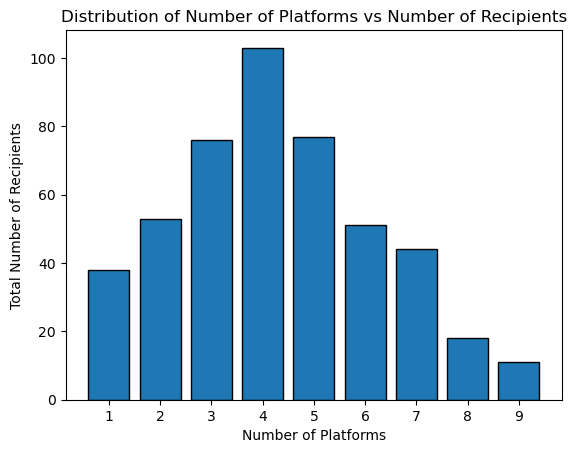

In [149]:
#Plot the distribution of Platforms used
variationNumberOfApps = socialApps_df.groupby('Number of Apps')

test3 = variationNumberOfApps.count()
plt.bar(test3.index, test3['2. Gender'], align='center', edgecolor='black')
plt.ylabel('Total Number of Recipients')
plt.xlabel('Number of Platforms')
plt.title('Distribution of Number of Platforms vs Number of Recipients')
plt.xticks(test3.index)
plt.savefig('output_data/distributionNumberOfPlatforms')
plt.show()

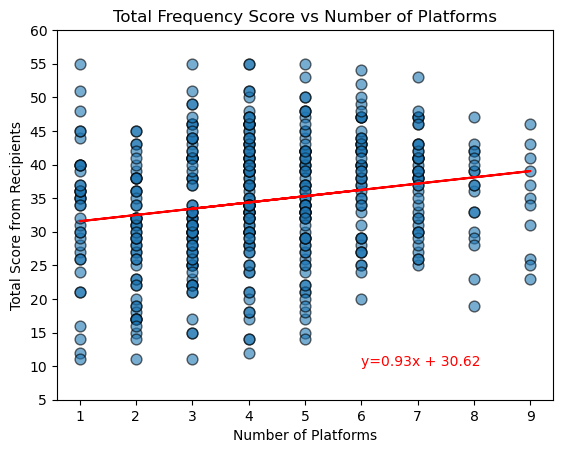

Pearson Correlation Factor: 0.20, Weak Correlation


In [150]:
#Scatter plot number of apps vs total frequency score
plt.scatter(socialApps_df['Number of Apps'], socialApps_df['Total Score'] , marker='o', alpha=0.6, edgecolors='black', s=60)

#Perform linear regression
slope, intercept, r, p, stderr = linregress(socialApps_df['Number of Apps'], socialApps_df['Total Score'])

#y=mx+b
line = slope * socialApps_df['Number of Apps'] + intercept

#Create plot
plt.plot(socialApps_df['Number of Apps'], line, 'r')
plt.annotate(f"y={slope:0.02f}x + {intercept:0.02f}", (6, 10), color='r')
plt.ylabel('Total Score from Recipients')
plt.xlabel('Number of Platforms')
plt.title('Total Frequency Score vs Number of Platforms')
plt.yticks(np.arange(5, 65, step=5))
plt.savefig('output_data/totalFrequencyVsNumberPlatforms')
plt.show()
#Weak Correlation
print(f"Pearson Correlation Factor: {r:0.02f}, Weak Correlation")

In [151]:
# Use group by and size function to perform the calculation
age_and_sleep_deprivation = main_df.groupby(["Age Groups","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"])
age_and_sleep_deprivation_count = age_and_sleep_deprivation.size().reset_index(name='Rating Count per Age Group')
# Create a pivot table that contains count of the responses,scale wise.
age_and_sleep_dep = age_and_sleep_deprivation_count.pivot(index='Age Groups', columns='20. On a scale of 1 to 5, how often do you face issues regarding sleep?',values= 'Rating Count per Age Group')
age_and_sleep_dep['Total'] = age_and_sleep_dep.sum(axis=1)
age_and_sleep_dep.loc['Total'] = age_and_sleep_dep.sum(axis=0)
age_and_sleep_dep

"20. On a scale of 1 to 5, how often do you face issues regarding sleep?",1,2,3,4,5,Total
Age Groups,,,,,,
0-9,0,0,0,0,0,0
10-19,6,11,4,11,19,51
20-24,43,45,50,58,78,274
25-29,6,10,6,17,16,55
30-39,9,10,1,7,8,35
40-49,14,9,5,11,2,41
50-59,3,3,2,3,0,11
60-95,1,1,0,0,2,4
Total,82,89,68,107,125,471


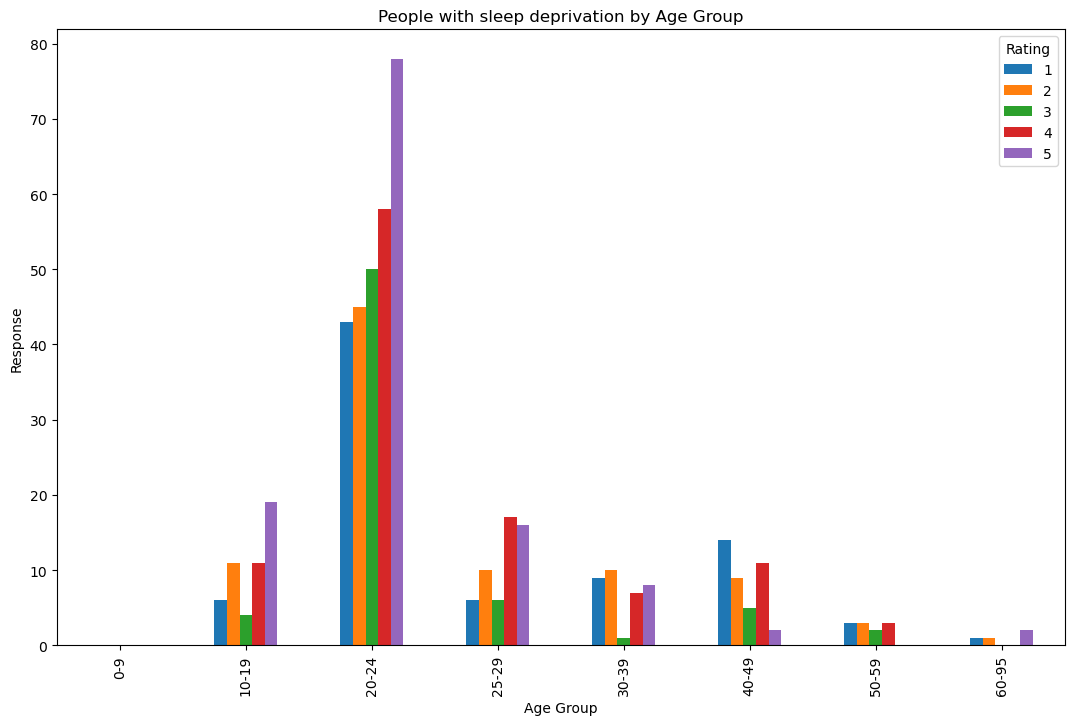

In [152]:
# Drop the extra colums and rows that are not needed. 
age_and_sleep_dep = age_and_sleep_dep.drop('Total', axis=0)
age_and_sleep_dep = age_and_sleep_dep.drop('Total', axis=1)

# Plot info for people with sleep deprivation by age group and display in a bar chart.
age_and_sleep_dep.plot(kind='bar',figsize=(13,8))
plt.xlabel('Age Group')
plt.ylabel('Response')
plt.title('People with sleep deprivation by Age Group')
plt.legend(title = 'Rating', loc='upper right', bbox_to_anchor=(1, 1))
plt.savefig("output_data/sleepDeprivationAndAgegroup.png")
plt.show()

In [153]:
# Create the table with gender, use groupby and aggegrate the number of genders, scale wise.
gender_sleep_deprivation =main_df.groupby(["2. Gender","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"]).agg({'2. Gender': ['count']})
gender_sleep_deprivation.reset_index()

,2. Gender,"20. On a scale of 1 to 5, how often do you face issues regarding sleep?",2. Gender
,,,count
0,Female,1,50
1,Female,2,43
2,Female,3,38
3,Female,4,62
4,Female,5,66
5,Male,1,28
6,Male,2,46
7,Male,3,30
8,Male,4,44


In [154]:
# Create bin to group the scales. 
scale_binning = [0,2.5,3.5,6]
scale_range =["1-2", "3", "4-5"]
scale_group_df = main_df.copy()
scale_group_df["Scale Groups"]=pd.cut(scale_group_df["20. On a scale of 1 to 5, how often do you face issues regarding sleep?"],scale_binning, labels = scale_range, include_lowest=False)

In [155]:
# Creat a table having gender, scale groups, and count of those that lise under the particular bin.
gender_sleep_deprivation = scale_group_df.groupby(["2. Gender","Scale Groups"]).agg({'2. Gender': ['count']}).reset_index()
gender_sleep_deprivation.columns = ['Gender', 'Scale Groups', 'Count']
gender_sleep_deprivation

,Gender,Scale Groups,Count
0,Female,1-2,93
1,Female,3,38
2,Female,4-5,128
3,Male,1-2,74
4,Male,3,30
5,Male,4-5,101
6,Others,1-2,4
7,Others,3,0
8,Others,4-5,3


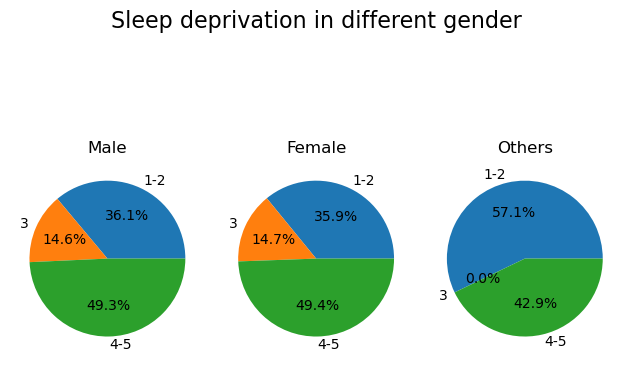

In [156]:
# Filter out the male,female, and others from the gender_sleep_deprivation table and plot the different pie chart to show the trend on sleep issue. 
# Separate the female data
female_data =gender_sleep_deprivation[gender_sleep_deprivation["Gender"]=="Female"]
# Separate the male data
male_data =gender_sleep_deprivation[gender_sleep_deprivation["Gender"]=="Male"]
# Separate the other data
other_data =gender_sleep_deprivation[gender_sleep_deprivation["Gender"]=="Others"]
#Use subplot to show different chart for each of the filtered out data.
plt.subplot(1, 3, 1)
plt.suptitle("Sleep deprivation in different gender", fontsize=16)
_ = plt.pie(male_data["Count"], labels=male_data["Scale Groups"], autopct="%1.1f%%")
plt.title("Male")

plt.subplot(1, 3, 2)
_ = plt.pie(female_data["Count"], labels=female_data["Scale Groups"], autopct="%1.1f%%")
_ = plt.title("Female")

plt.subplot(1,3,3)
_ = plt.pie(other_data["Count"], labels=other_data["Scale Groups"], autopct="%1.1f%%")
_ = plt.title("Others")
plt.tight_layout(pad=1.0)
plt.savefig("output_data/sleepDeprivationAndGender.png")


## Sleep Deprivation in different gender
From the above pie chart, we can conclude that there is no big significance in rating for sleep deprivation in different genders. The ratings between both male and female groups are almost similar. I have tried to plot the chart for others even-though the data set was extremely low. We can see the similar trend between all the genders.There isn’t specific pattern. All the genders male, female and others are equally affected by the social media in term of sleep. They all are being sleep deprived by the social media. So we can say that the social media is being an issue and affecting all genders on their mental health.

In [157]:
sleep_depravation_rating = main_df["20. On a scale of 1 to 5, how often do you face issues regarding sleep?"].mean()
sleep_depravation_rating


3.2208067940552016

In [158]:
# Use groupby to categorize data by Occupation.
occupation_sleep_dep = main_df.groupby(["4. Occupation Status","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"])
occupation_sleep_deprivation_count = occupation_sleep_dep.size().reset_index(name='Rating Count per Occupation')
# Create pivot table using the the data after groupby.
occupation_sleep_deprivation = occupation_sleep_deprivation_count.pivot(index='4. Occupation Status', columns='20. On a scale of 1 to 5, how often do you face issues regarding sleep?',values= 'Rating Count per Occupation')
occupation_sleep_deprivation['Total'] = occupation_sleep_deprivation.sum(axis=1)
occupation_sleep_deprivation.loc['Total'] = occupation_sleep_deprivation.sum(axis=0)
occupation_sleep_deprivation

"20. On a scale of 1 to 5, how often do you face issues regarding sleep?",1,2,3,4,5,Total
4. Occupation Status,,,,,,
Retired,2.0,2.0,NaN,3.0,1.0,8.0
Salaried Worker,33.0,29.0,15.0,29.0,18.0,124.0
School Student,6.0,16.0,5.0,8.0,14.0,49.0
University Student,41.0,42.0,48.0,67.0,92.0,290.0
Total,82.0,89.0,68.0,107.0,125.0,471.0


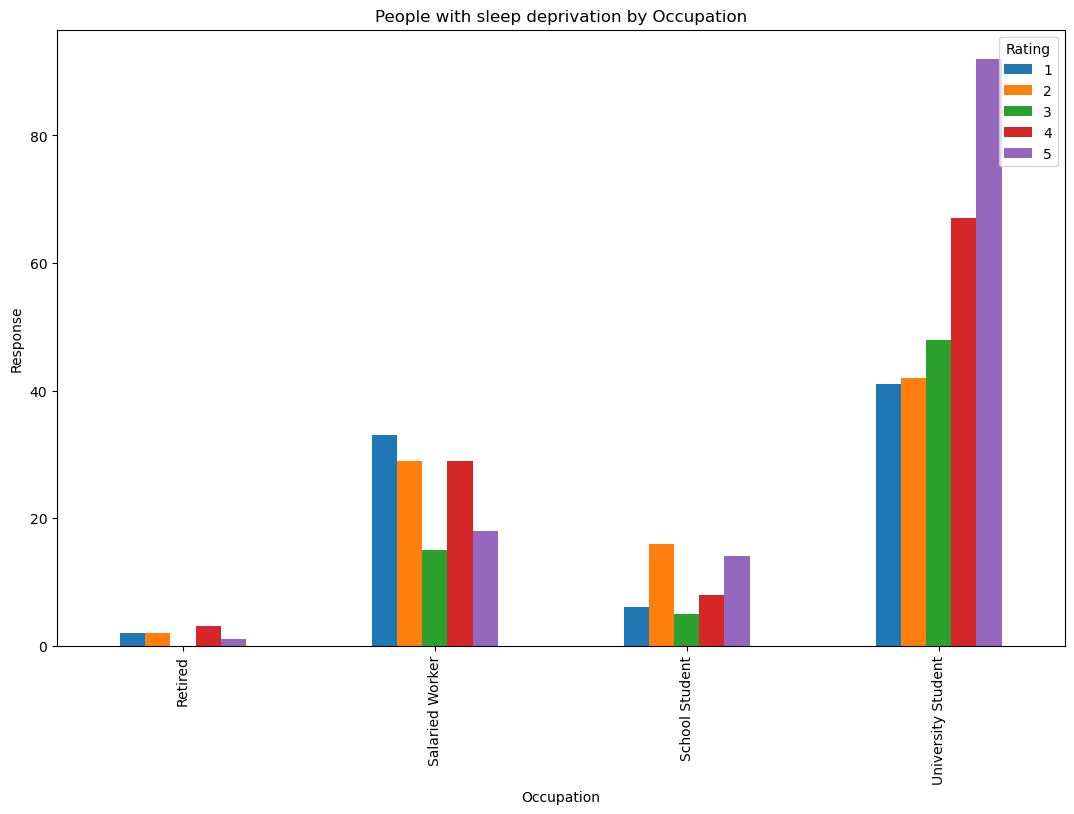

In [159]:
# Drop the unwanted row and column.
occupation_sleep_deprivation = occupation_sleep_deprivation.drop('Total', axis=0)
occupation_sleep_deprivation = occupation_sleep_deprivation.drop('Total', axis=1)
# Plot info
occupation_sleep_deprivation.plot(kind='bar',figsize=(13,8))
plt.xlabel('Occupation')
plt.ylabel('Response')
plt.title('People with sleep deprivation by Occupation')
plt.legend(title = 'Rating', loc='upper right', bbox_to_anchor=(1, 1))
plt.savefig("output_data/sleepDeprivationAndOccupation.png")
plt.show()

## People with sleep deprivation by Occupation
Here we can say that the salaried workers and the university students are into social media more than retired and school students. It is because of the kind of data set as well. The proportion of the data of people between 20 to 29 is comparatively high. So we cannot make the conclusion here. If we had closely distributed data set we could come up with the good conculsion at this point. We will definately through in the future. 

In [160]:
#Get Number of Social Apps into a List
appsList = main_df.iloc[:, 7]

#Creating a variable to store # amount of apps
numberOfApps = []

#Creating a variable to store list of the split result string list
listOfApps = []

for app in appsList:
    listOfApps.append(app.split(";"))

#Add Number of Apps to DF

listOfNumberApps = [len(x) for x in listOfApps]

main_df['Number of Apps'] = listOfNumberApps
main_df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Average Time on Social Media,Age Groups,Number of Apps
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,...,5,2,3,2,5,4,5,0-3 hours,20-24,6
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,4,5,1,1,5,4,5,5+ hours,20-24,6
2,2022/04/18 7:25:58 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,...,4,3,3,1,4,2,5,3-5 hours,20-24,4
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,...,3,5,1,2,4,3,2,5+ hours,20-24,2
4,2022/04/18 7:33:31 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,...,5,3,3,3,4,4,1,0-3 hours,20-24,3


In [161]:
# Use groupby to create the pivot tables.
New_test = main_df.loc[ :, ["1. What is your age?","2. Gender","4. Occupation Status","20. On a scale of 1 to 5, how often do you face issues regarding sleep?","Age Groups","Number of Apps","Average Time on Social Media"]]
sleep_deprivation =New_test.groupby(["Average Time on Social Media","Age Groups"])
sleep_deprivation_count = sleep_deprivation.size().reset_index(name='Rating Count per Age Group')
sleep_dep =sleep_deprivation_count.pivot(index="Average Time on Social Media", columns="Age Groups",values= 'Rating Count per Age Group')
sleep_dep['Total'] = sleep_dep.sum(axis=1)
sleep_dep.loc['Total'] = sleep_dep.sum(axis=0)
sleep_dep

Age Groups,0-9,10-19,20-24,25-29,30-39,40-49,50-59,60-95,Total
Average Time on Social Media,,,,,,,,,
0-3 hours,0,15,90,21,25,34,10,2,197
3-5 hours,0,24,98,20,8,6,1,1,158
5+ hours,0,12,86,14,2,1,0,1,116
Total,0,51,274,55,35,41,11,4,471


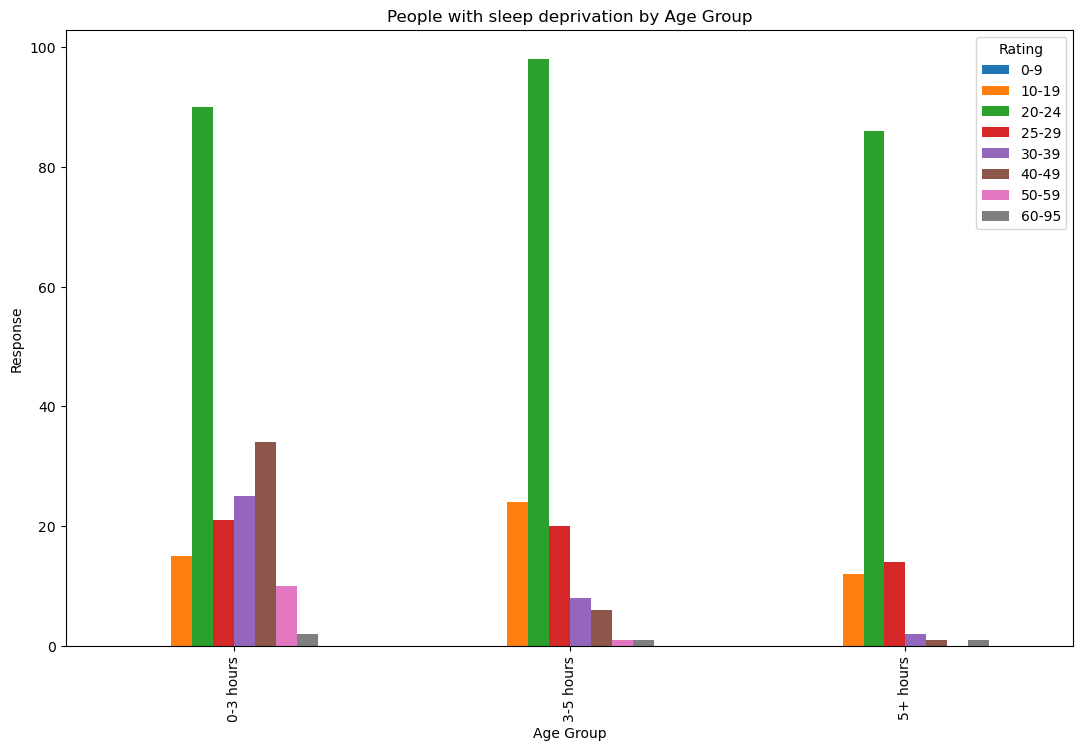

In [162]:
# Drop the not needed column and row from the pivot table.
sleep_dep = sleep_dep.drop('Total', axis=0)
sleep_dep = sleep_dep.drop('Total', axis=1)

# Plot info
sleep_dep.plot(kind='bar',figsize=(13,8))
plt.xlabel('Age Group')
plt.ylabel('Response')
plt.title('People with sleep deprivation by Age Group')
plt.legend(title = 'Rating', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

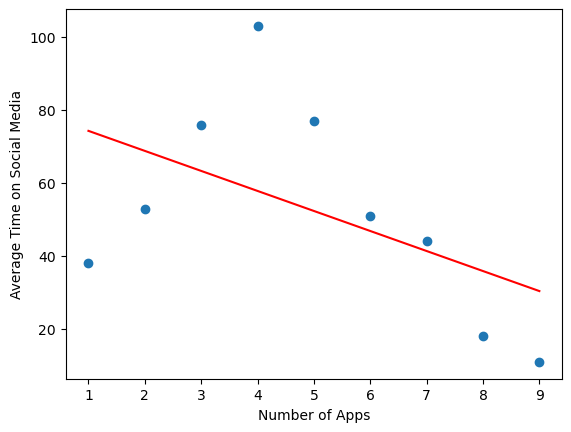

In [163]:
app_and_hours =New_test.groupby(["Number of Apps"])
app_count = pd.DataFrame(app_and_hours["Average Time on Social Media"].count()).reset_index()
average_time =app_count["Average Time on Social Media"] 
number_of_app =app_count['Number of Apps']
(slope, intercept, rvalue, pvalue, stderr) = linregress(number_of_app, average_time)
regress_values = number_of_app * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(number_of_app, average_time)
plt.plot(number_of_app,regress_values,"r-")
plt.ylabel("Average Time on Social Media")
plt.xlabel("Number of Apps")
plt.show()

In [164]:
time_spent_on_social_media = []
for index, row in main_df.iterrows():
    if row['8. What is the average time you spend on social media every day?'] == 'Between 0 and 1 hours':
        time_spent_on_social_media.append(1)
    if row['8. What is the average time you spend on social media every day?'] == 'Less than an Hour':
        time_spent_on_social_media.append(0.5)
    elif row['8. What is the average time you spend on social media every day?'] == 'Between 1 and 2 hours':
        time_spent_on_social_media.append(1)
    elif row['8. What is the average time you spend on social media every day?'] == 'Between 2 and 3 hours':
        time_spent_on_social_media.append(2)
    elif row['8. What is the average time you spend on social media every day?'] == 'Between 3 and 4 hours':
        time_spent_on_social_media.append(3)
    elif row['8. What is the average time you spend on social media every day?'] == 'Between 4 and 5 hours':
        time_spent_on_social_media.append(4)
    elif row['8. What is the average time you spend on social media every day?'] == 'More than 5 hours':
        time_spent_on_social_media.append(5)
main_df['Time Spent'] = time_spent_on_social_media
main_df.head(2)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Average Time on Social Media,Age Groups,Number of Apps,Time Spent
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,...,2,3,2,5,4,5,0-3 hours,20-24,6,2.0
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,5,1,1,5,4,5,5+ hours,20-24,6,5.0


In [165]:
half_hour_df = main_df.loc[main_df["Time Spent"]== 0.5,: ]
one_hour_df = main_df.loc[main_df["Time Spent"]== 1,: ]
two_hour_df = main_df.loc[main_df["Time Spent"]== 2,: ]
three_hour_df = main_df.loc[main_df["Time Spent"]== 3,: ]
four_hour_df = main_df.loc[main_df["Time Spent"]== 4,: ]
five_hour_df = main_df.loc[main_df["Time Spent"]== 5,: ]
five_hour_df.head(2)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Average Time on Social Media,Age Groups,Number of Apps,Time Spent
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,5,1,1,5,4,5,5+ hours,20-24,6,5.0
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,...,5,1,2,4,3,2,5+ hours,20-24,2,5.0


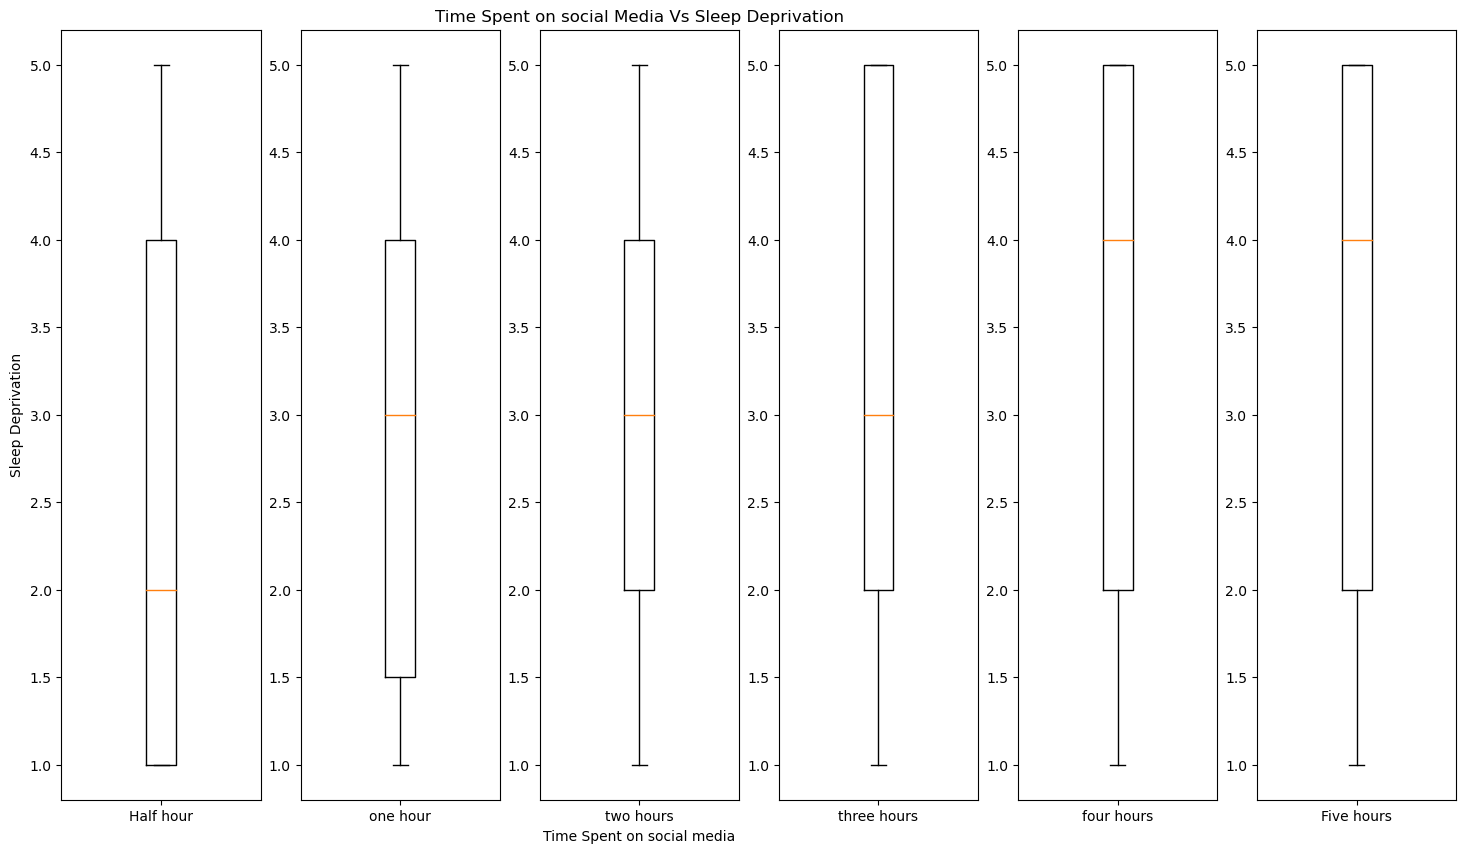

In [166]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
fig.set_size_inches(18, 10)
ax1.boxplot(half_hour_df['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'])
ax2.boxplot(one_hour_df['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'])
ax3.boxplot(two_hour_df['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'])
ax4.boxplot(three_hour_df['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'])
ax5.boxplot(four_hour_df['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'])
ax6.boxplot(five_hour_df['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'])
ax1.set_ylabel('Sleep Deprivation')
ax3.set_xlabel('Time Spent on social media')
ax3.set_title('Time Spent on social Media Vs Sleep Deprivation')
ax1.set_xticklabels(["Half hour"])
ax2.set_xticklabels(["one hour"])
ax3.set_xticklabels(["two hours"])
ax4.set_xticklabels(["three hours"])
ax5.set_xticklabels(["four hours"])
ax6.set_xticklabels(["Five hours"])
plt.savefig("output_data/timeSpentOnSocialMediaVsSleepDeprivation")
plt.show()

# Time Spent on social Media Vs Sleep Deprivation
1. From the box plot "Time spent on social media vs sleep deprivation", We can see how the rating are increasing with the time spent on the social media, from half hour to one hour we can see the increment in the ratings, there is not much difference in one and two hours but going to three hours to 4 hours we can see huge difference in the ratings.From this chart we can infer that the more time we spend on social media,the more sleep deprived we become.As a result, the depression total score increases as we spent more time on social media. Therefore, social media does have a negative impact on mental health.' 
2. There is still a lot to consider in this project like getting the more closely distributed data, big data sets and different other factors like weather, seasons etc. If we had more time to explore on this topics we could come up with other interesting analysis as well. 


THE BIG PICTURE
The biggest challenge we see, based on the self ratings that the participants in the survey is related to ADHD issues, followed by Depression. We assesed this based on the aggregation of the points given by the participants. We tried to find if there is a correlation between the time on Social media and depression by plotting a scatter, but we got some weird looking chart, with the point clustered in vertical lines around each time slot, perhaps because we do not have enough spread in the time value. We would be interested in delving further into this in future studies because of the huge total points that we calculated for depression, about 28% of the whole Total points. Another unsurprising observation is that there are more University students than all the other groups of participants combined.Moreover, there are more singles than all the other marital status combined. It will be interesting if this sample is an accuraterepresentation of society.  

In [169]:
DD_df = socialApps_df.copy()

In [170]:
DD_df["WorriestotalScore"] = DD_df["Anxiety Total Score"]+ DD_df["Self Esteem Total Score"]
DD_df["sleeptotalScore"] = DD_df["Anxiety Total Score"]+DD_df["Depression Total Score"]
DD_df["DepresstotalScore"] = DD_df["Depression Total Score"]+DD_df["Self Esteem Total Score"]
DD_df

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,ADHD Q1,ADHD Q2,...,Number of Apps,App Groups,ADHD Total Score,Self Esteem Total Score,Anxiety Total Score,Depression Total Score,Total Score,WorriestotalScore,sleeptotalScore,DepresstotalScore
0,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,3,...,6,6+,18,4,4,14,40,8,18,18
1,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,3,...,6,6+,15,6,7,14,42,13,21,20
2,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,2,...,4,3-5,11,4,6,11,32,10,17,15
3,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,2,...,2,1-2,12,7,6,9,34,13,15,16
4,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,5,...,3,3-5,17,6,9,9,41,15,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,15.0,Male,Single,School Student,School,Yes,Instagram;YouTube;Discord;Reddit,Between 4 and 5 hours,1,1,...,4,3-5,8,6,4,3,21,10,7,9
470,20.0,Female,Single,University Student,Company,Yes,Instagram;YouTube;Snapchat;Discord;Reddit;Pint...,Between 1 and 2 hours,2,2,...,7,6+,10,7,6,14,37,13,20,21
471,20.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,More than 5 hours,5,4,...,3,3-5,16,3,7,11,37,10,18,14
472,35.0,Female,Married,Salaried Worker,Company,Yes,Facebook;Instagram;YouTube,Between 1 and 2 hours,3,2,...,3,3-5,10,3,5,10,28,8,15,13


In [171]:
DD_df["WorriestotalScore"] = DD_df["Anxiety Total Score"]+ DD_df["Self Esteem Total Score"]
DD_df["sleeptotalScore"] = DD_df["Anxiety Total Score"]+DD_df["Depression Total Score"]
DD_df["DepresstotalScore"] = DD_df["Depression Total Score"]+DD_df["Self Esteem Total Score"]

In [172]:
DD_list = DD_df.columns.tolist()
print(DD_list)

['1. What is your age?', '2. Gender', '3. Relationship Status', '4. Occupation Status', '5. What type of organizations are you affiliated with?', '6. Do you use social media?', '7. What social media platforms do you commonly use?', '8. What is the average time you spend on social media every day?', 'ADHD Q1', 'ADHD Q2', 'Anxiety Q1', 'ADHD Q3', 'Anxiety Q2', 'ADHD Q4', 'Self Esteem Q1', '16. Following the previous question, how do you feel about these comparisons, generally speaking?', 'Self Esteem Q2', 'Depression Q1', 'Depression Q2', 'Depression Q3', 'Average Time on Social Media', 'Age Groups', 'Number of Apps', 'App Groups', 'ADHD Total Score', 'Self Esteem Total Score', 'Anxiety Total Score', 'Depression Total Score', 'Total Score', 'WorriestotalScore', 'sleeptotalScore', 'DepresstotalScore']


In [188]:
DD_df.mean(axis = 0, skipna = True)

C:\Users\megad\AppData\Local\Temp\ipykernel_14556\3449830247.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  DD_df.mean(axis = 0, skipna = True)


1. What is your age?                                                                                 26.031210
ADHD Q1                                                                                               3.573248
ADHD Q2                                                                                               3.335456
Anxiety Q1                                                                                            2.596603
ADHD Q3                                                                                               3.358811
Anxiety Q2                                                                                            3.577495
ADHD Q4                                                                                               3.254777
Self Esteem Q1                                                                                        2.832272
16. Following the previous question, how do you feel about these comparisons, generally speaking?     2.783439
S

In [174]:
Effects_df = pd.DataFrame({"Summary effects of SM use":["ADHD Total Score","Self Esteem Total Score", "Anxiety Total Score", "Depression Total Score"],"Total Scores":[6369,2488,2908,4550]})
Effects_df

,Summary effects of SM use,Total Scores
0,ADHD Total Score,6369
1,Self Esteem Total Score,2488
2,Anxiety Total Score,2908
3,Depression Total Score,4550


<Axes: title={'center': 'Summary effects of SM Use on respondents'}, xlabel='Summary effects of SM use'>

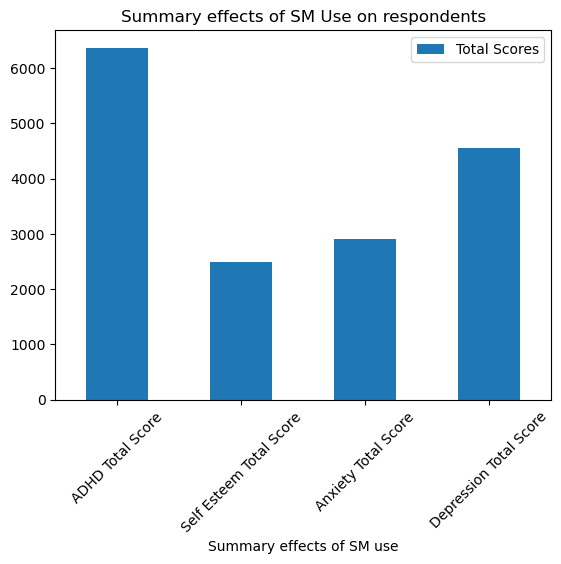

In [181]:
Effects_df.plot.bar(x= "Summary effects of SM use", y= "Total Scores", rot = 45, title="Summary effects of SM Use on respondents")

In [182]:
DD_df["4. Occupation Status"].value_counts()

University Student    290
Salaried Worker       124
School Student         49
Retired                 8
Name: 4. Occupation Status, dtype: int64

In [183]:
DD_df["3. Relationship Status"].value_counts()

Single               282
Married               96
In a relationship     87
Divorced               6
Name: 3. Relationship Status, dtype: int64

In [185]:
DD_df["3. Relationship Status"].value_counts()

Single               282
Married               96
In a relationship     87
Divorced               6
Name: 3. Relationship Status, dtype: int64

In [186]:
Relationship_df = pd.DataFrame({"Marital status":["Single","Married", "In a relationship", "Divorced"],"count":[282,96,87,6]})
Relationship_df

,Marital status,count
0,Single,282
1,Married,96
2,In a relationship,87
3,Divorced,6


<Axes: title={'center': 'Divorced people do not use SM?'}, xlabel='Marital status'>

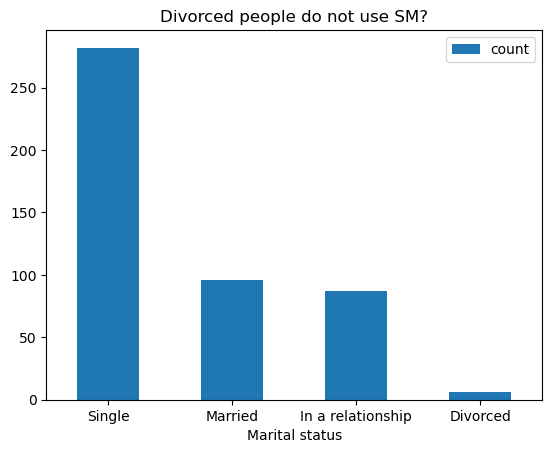

In [187]:
Relationship_df.plot.bar(x="Marital status",y="count", rot = 0, title ="Divorced people do not use SM?")